<a href="https://colab.research.google.com/github/yeoneegit/DL-project/blob/main/DL_Project_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, auc, roc_auc_score,accuracy_score, confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19, Xception, InceptionV3, InceptionResNetV2
from tensorflow.keras.applications import ResNet50, ResNet101, ResNet152
from tensorflow.keras.applications import EfficientNetB0, EfficientNetB3, EfficientNetB5, EfficientNetB7
from tensorflow.keras.applications import DenseNet121, DenseNet169, DenseNet201
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense, MaxPooling2D, Input, GlobalAveragePooling2D, concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from itertools import cycle


In [ ]:
path = './drive/MyDrive/DL_project/banknote/'

bill_test = pd.read_csv(path + 'test_labels.csv')
bill_train = pd.read_csv(path + 'train_labels.csv')

bill_train['image path'] = path + 'train/' + bill_train['path']
bill_test['image path'] = path + 'test/' + bill_test['path']

bill = pd.concat([bill_train, bill_test])
bill.reset_index(drop=True, inplace=True)

bill.head()

path  label                                        image path
0  36.jpg      1  ./drive/MyDrive/DL_project/banknote/train/36.jpg
1  37.jpg      1  ./drive/MyDrive/DL_project/banknote/train/37.jpg
2  38.jpg      1  ./drive/MyDrive/DL_project/banknote/train/38.jpg
3  39.jpg      1  ./drive/MyDrive/DL_project/banknote/train/39.jpg
4  40.jpg      1  ./drive/MyDrive/DL_project/banknote/train/40.jpg

In [ ]:
train_data_path = '/content/drive/MyDrive/DL_project/banknote/train/'
test_data_path = '/content/drive/MyDrive/DL_project/banknote/test/'

In [ ]:
def readImage(test_data_path):
    bgr_img = cv2.imread(test_data_path)
    b,g,r = cv2.split(bgr_img)
    rgb_img = cv2.merge([r,g,b])
    return rgb_img

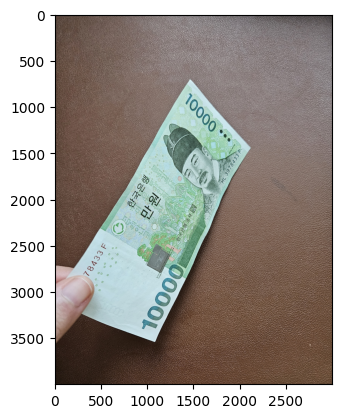

In [ ]:
rgb_img = readImage(bill.iloc[0]['image path'])
plt.imshow(rgb_img)

In [ ]:
bill_train.head()

path  label                                        image path
0  36.jpg      1  ./drive/MyDrive/DL_project/banknote/train/36.jpg
1  37.jpg      1  ./drive/MyDrive/DL_project/banknote/train/37.jpg
2  38.jpg      1  ./drive/MyDrive/DL_project/banknote/train/38.jpg
3  39.jpg      1  ./drive/MyDrive/DL_project/banknote/train/39.jpg
4  40.jpg      1  ./drive/MyDrive/DL_project/banknote/train/40.jpg

In [ ]:
X_train, X_val = train_test_split(bill_train, test_size=0.2, random_state=101)
X_train['label'] = X_train['label'].astype('str')
X_val['label'] = X_val['label'].astype('str')

X_test = bill_test.copy()
X_test['label'] = X_test['label'].astype('str')

In [ ]:
# 데이터 증강하지 않고, 데이터

IMGSIZE = 256
BATCH_SIZE = 20
EPOCHS = 100


train_datagen =  ImageDataGenerator(rescale=1. / 256)

train_generator = train_datagen.flow_from_dataframe(
            X_train,
            x_col='image path',
            y_col='label',
            target_size=(IMGSIZE, IMGSIZE),
            batch_size=BATCH_SIZE,
            class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./256)

val_generator =  test_datagen.flow_from_dataframe(
            X_val,
            x_col='image path',
            y_col='label',
            target_size=(IMGSIZE, IMGSIZE),
            batch_size=BATCH_SIZE,
            class_mode='binary')

test_generator =  test_datagen.flow_from_dataframe(
            X_test,
            x_col='image path',
            y_col='label',
            target_size=(IMGSIZE, IMGSIZE),
            batch_size=BATCH_SIZE,
            class_mode='binary')

Found 192 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.
Found 60 validated image filenames belonging to 2 classes.


In [ ]:
class_map = train_generator.class_indices
class_map

{'0': 0, '1': 1}

# 📌 VGG19
- optimizer : Adam
- Learning Rate : 0.001
- epoch : 100

In [ ]:
IMGSIZE = 256
BATCH_SIZE = 20
EPOCHS = 200

# 훈련 데이터에 대한 데이터 증강 설정
train_datagen = ImageDataGenerator(
    rescale=1./256,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 테스트 데이터에 대한 전처리 (증강을 적용하지 않음)
test_datagen = ImageDataGenerator(rescale=1./256)

# 훈련 데이터 제너레이터 생성
train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 검증 데이터 제너레이터 생성 (증강을 적용하지 않음)
val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 테스트 데이터 제너레이터 생성 (증강을 적용하지 않음)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 192 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.
Found 60 validated image filenames belonging to 2 classes.


In [ ]:
# optimizer : 신경망의 가중치와 절편을 학습하기 위한 알고리즘 혹은 방법 / SGD,네스테로프 모멘텀, Adam 등등
optimizer = Adam(learning_rate=0.001)


base_model = VGG19(weights="imagenet", include_top=False, input_tensor=Input(shape=(IMGSIZE, IMGSIZE, 3)))
base_model.trainable = False


x = base_model.output
x = AveragePooling2D(pool_size=(5, 5))(x)
x = Dropout(0.2)(x) # 드롭아웃 : 과대적합 방지, 훈련이 끝난 뒤 평가 or 예측시에는 드롭아웃 적용 X
x = Flatten(name="flatten")(x) # flatten : 은닉층
outputs = Dense(1, activation="sigmoid")(x) # 이진분류일 경우, sigmoid

model = Model(inputs=base_model.input, outputs=outputs)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
reducelr = ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=0, factor=0.5)

In [ ]:
train_generator = cycle(train_generator)

history = model.fit(train_generator,
                    steps_per_epoch = len(X_train) // BATCH_SIZE,
                    validation_data = val_generator,
                    validation_steps= len(X_val) // BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=[reducelr, earlystop])

Epoch 1/200
9/9 [==============================] - 35s 4s/step - loss: 0.6370 - binary_accuracy: 0.6611 - val_loss: 0.6601 - val_binary_accuracy: 0.5000 - lr: 0.0010
Epoch 2/200
9/9 [==============================] - 25s 3s/step - loss: 0.6075 - binary_accuracy: 0.6744 - val_loss: 0.6475 - val_binary_accuracy: 0.5000 - lr: 0.0010
Epoch 3/200
9/9 [==============================] - 27s 3s/step - loss: 0.5746 - binary_accuracy: 0.7093 - val_loss: 0.6230 - val_binary_accuracy: 0.5250 - lr: 0.0010
Epoch 4/200
9/9 [==============================] - 27s 3s/step - loss: 0.5569 - binary_accuracy: 0.7209 - val_loss: 0.6167 - val_binary_accuracy: 0.5250 - lr: 0.0010
Epoch 5/200
9/9 [==============================] - 26s 3s/step - loss: 0.5775 - binary_accuracy: 0.6919 - val_loss: 0.5742 - val_binary_accuracy: 0.7250 - lr: 0.0010
Epoch 6/200
9/9 [==============================] - 26s 3s/step - loss: 0.4935 - binary_accuracy: 0.8256 - val_loss: 0.5286 - val_binary_accuracy: 0.7750 - lr: 0.0010
Epoc

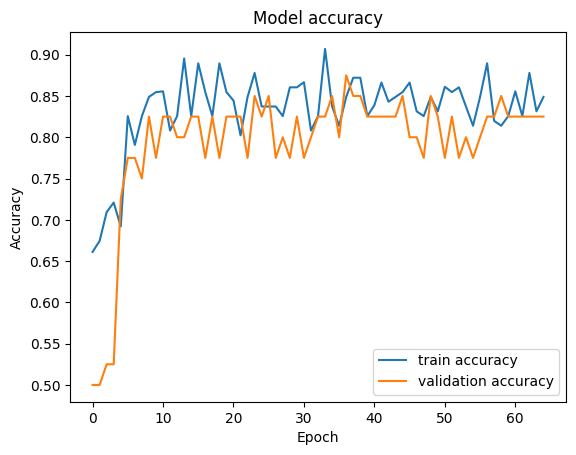

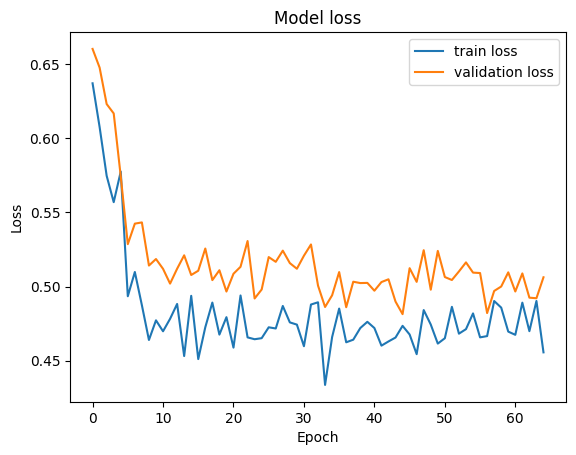

In [ ]:
def plot_accuracy(history):

    plt.plot(history.history['binary_accuracy'],label='train accuracy')
    plt.plot(history.history['val_binary_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

def plot_loss(history):

    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

plot_accuracy(history)
plot_loss(history)

In [ ]:
np_samples = len(test_generator.filenames)

In [ ]:
test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)

<ipython-input-32-ef18cebdec9e>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)


 3/60 [>.............................] - ETA: 2:17

60/60 [==============================] - 7s 83ms/step


In [ ]:
y_pred = [ 1 if y >= 0.5 else 0 for y in test_predictions]
y_true = test_generator.labels
min_length = min(len(y_true), len(y_pred))
y_true = y_true[:min_length]
y_pred = y_pred[:min_length]
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

              precision    recall  f1-score   support

           0       0.25      0.04      0.07        24
           1       0.59      0.92      0.72        36

    accuracy                           0.57        60
   macro avg       0.42      0.48      0.39        60
weighted avg       0.45      0.57      0.46        60



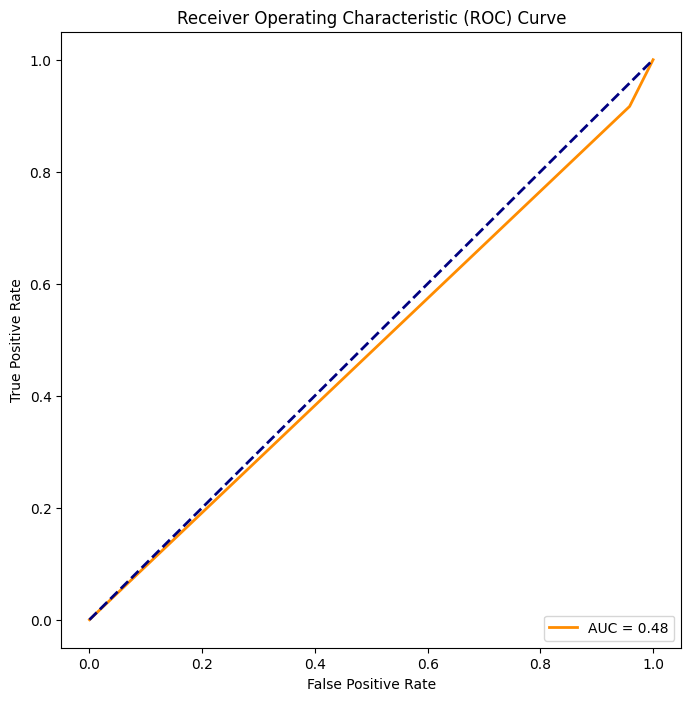

In [ ]:
# ROC 커브를 계산
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 커브 시각화
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

----
# VGG19
- learning rate = 0.03

In [ ]:
optimizer = Adam(learning_rate=0.001)

base_model = VGG19(weights="imagenet", include_top=False, input_tensor=Input(shape=(IMGSIZE, IMGSIZE, 3)))
base_model.trainable = False

x = base_model.output
x = AveragePooling2D(pool_size=(5, 5))(x)
x = Dropout(0.2)(x)
x = Flatten(name="flatten")(x)
outputs = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=outputs)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
reducelr = ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=0, factor=0.5)

train_generator = cycle(train_generator)

history = model.fit(train_generator,
                    steps_per_epoch = len(X_train) // BATCH_SIZE,
                    validation_data = val_generator,
                    validation_steps= len(X_val) // BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=[reducelr, earlystop])


Epoch 1/100
9/9 [==============================] - 30s 4s/step - loss: 0.7788 - binary_accuracy: 0.6105 - val_loss: 0.8274 - val_binary_accuracy: 0.5000 - lr: 0.0010
Epoch 2/100
9/9 [==============================] - 21s 3s/step - loss: 0.7237 - binary_accuracy: 0.5930 - val_loss: 0.6692 - val_binary_accuracy: 0.5750 - lr: 0.0010
Epoch 3/100
9/9 [==============================] - 23s 3s/step - loss: 0.6917 - binary_accuracy: 0.5111 - val_loss: 0.6393 - val_binary_accuracy: 0.5750 - lr: 0.0010
Epoch 4/100
9/9 [==============================] - 21s 3s/step - loss: 0.6555 - binary_accuracy: 0.5872 - val_loss: 0.6226 - val_binary_accuracy: 0.6000 - lr: 0.0010
Epoch 5/100
9/9 [==============================] - 23s 3s/step - loss: 0.6036 - binary_accuracy: 0.6337 - val_loss: 0.6103 - val_binary_accuracy: 0.5750 - lr: 0.0010
Epoch 6/100
9/9 [==============================] - 22s 3s/step - loss: 0.5683 - binary_accuracy: 0.6802 - val_loss: 0.5613 - val_binary_accuracy: 0.6750 - lr: 0.0010
Epoc

In [ ]:
def plot_accuracy(history):

    plt.plot(history.history['binary_accuracy'],label='train accuracy')
    plt.plot(history.history['val_binary_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

def plot_loss(history):

    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()


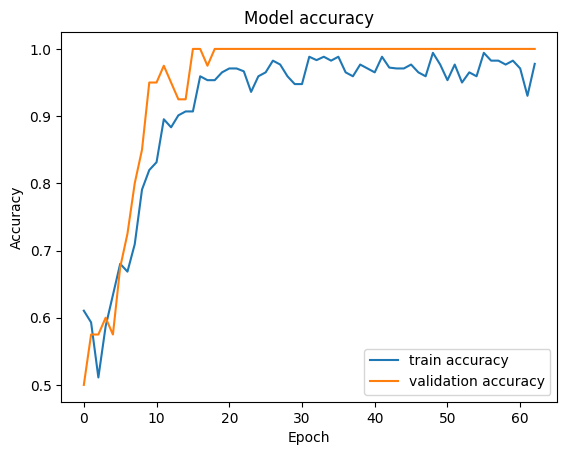

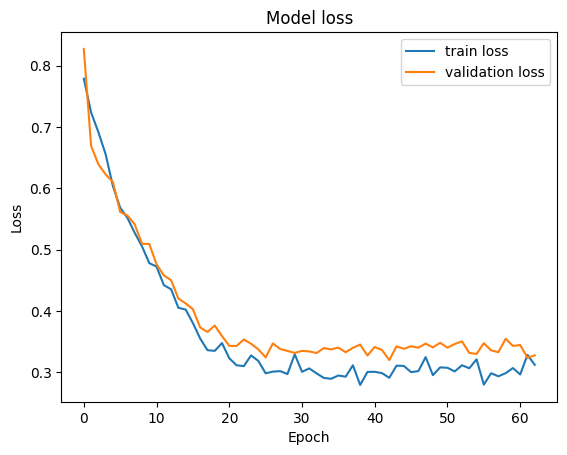

In [ ]:
plot_accuracy(history)
plot_loss(history)

In [ ]:
np_samples = len(test_generator.filenames)
test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)

<ipython-input-20-715e340fdd3c>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)


 3/60 [>.............................] - ETA: 2:12

60/60 [==============================] - 7s 80ms/step


In [ ]:
y_pred = [ 1 if y >= 0.5 else 0 for y in test_predictions]
y_true = test_generator.labels
min_length = min(len(y_true), len(y_pred))
y_true = y_true[:min_length]
y_pred = y_pred[:min_length]
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

              precision    recall  f1-score   support

           0       0.42      0.33      0.37        24
           1       0.61      0.69      0.65        36

    accuracy                           0.55        60
   macro avg       0.52      0.51      0.51        60
weighted avg       0.53      0.55      0.54        60



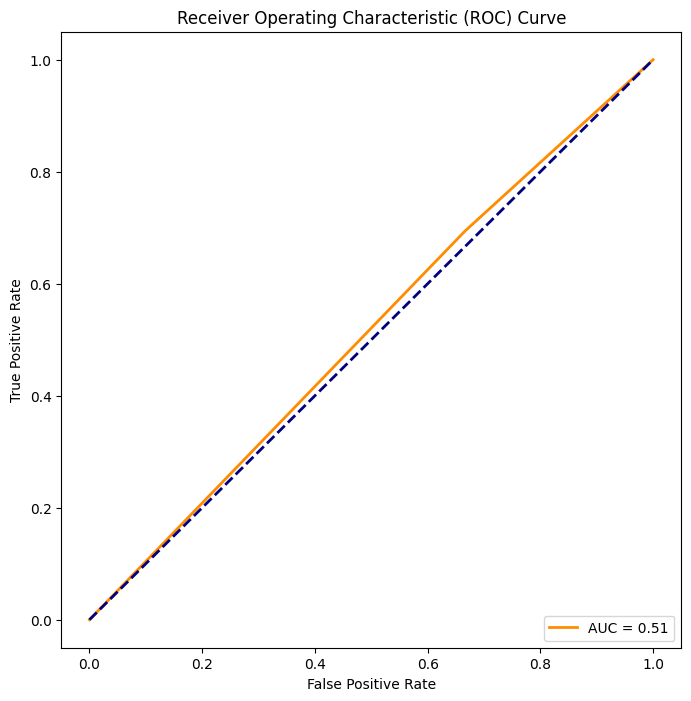

In [ ]:
# ROC 커브를 계산
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 커브 시각화
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

---

# 2. ResNet50
- opitimzer : Adam
- Learning rate : 0.001
- epochs : 52/100
- early stopping patience : 20

In [ ]:
optimizer = Adam(learning_rate=0.001)

# Xception : Xception은 71개 계층으로 구성된 컨벌루션 신경망. ImageNet 데이터베이스의 1백만 개가 넘는 영상에 대해 훈련된 신경망의 사전 훈련된 버전을 불러올 수 있음
base_model = ResNet50(weights="imagenet", include_top=False, input_tensor=Input(shape=(IMGSIZE, IMGSIZE, 3)))
base_model.trainable = False


x = base_model.output
x = AveragePooling2D(pool_size=(5, 5))(x)
x = Dropout(0.2)(x) # 드롭아웃 : 과대적합 방지, 훈련이 끝난 뒤 평가 or 예측시에는 드롭아웃 적용 X
x = Flatten(name="flatten")(x) # flatten : 은닉층
outputs = Dense(1, activation="sigmoid")(x) # 이진분류일 경우, sigmoid

model = Model(inputs=base_model.input, outputs=outputs)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [ ]:
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_4[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
reducelr = ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=0, factor=0.5)

In [ ]:
train_generator = cycle(train_generator)

history = model.fit(train_generator,
                    steps_per_epoch = len(X_train) // BATCH_SIZE,
                    validation_data = val_generator,
                    validation_steps= len(X_val) // BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=[reducelr, earlystop])

Epoch 1/100
9/9 [==============================] - 34s 4s/step - loss: 0.6717 - binary_accuracy: 0.6337 - val_loss: 0.7672 - val_binary_accuracy: 0.5250 - lr: 0.0010
Epoch 2/100
9/9 [==============================] - 22s 3s/step - loss: 0.7041 - binary_accuracy: 0.5698 - val_loss: 0.6628 - val_binary_accuracy: 0.5500 - lr: 0.0010
Epoch 3/100
9/9 [==============================] - 25s 3s/step - loss: 0.6548 - binary_accuracy: 0.6047 - val_loss: 0.6699 - val_binary_accuracy: 0.5250 - lr: 0.0010
Epoch 4/100
9/9 [==============================] - 23s 3s/step - loss: 0.6516 - binary_accuracy: 0.6221 - val_loss: 0.6905 - val_binary_accuracy: 0.4750 - lr: 5.0000e-04
Epoch 5/100
9/9 [==============================] - 25s 3s/step - loss: 0.5900 - binary_accuracy: 0.6512 - val_loss: 0.6603 - val_binary_accuracy: 0.5250 - lr: 2.5000e-04
Epoch 6/100
9/9 [==============================] - 24s 3s/step - loss: 0.6308 - binary_accuracy: 0.6570 - val_loss: 0.6587 - val_binary_accuracy: 0.5000 - lr: 2.5

In [ ]:
def plot_accuracy(history):

    plt.plot(history.history['binary_accuracy'],label='train accuracy')
    plt.plot(history.history['val_binary_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

def plot_loss(history):

    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

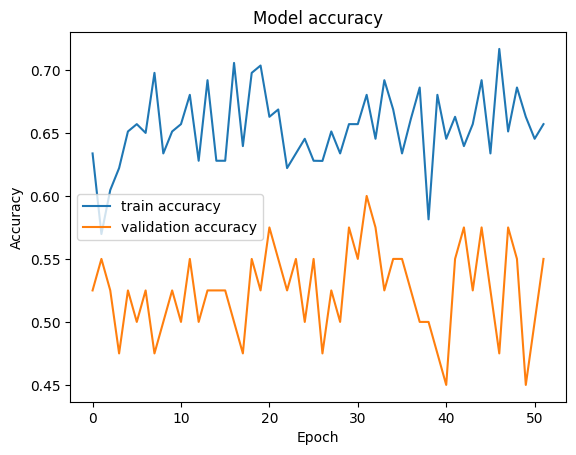

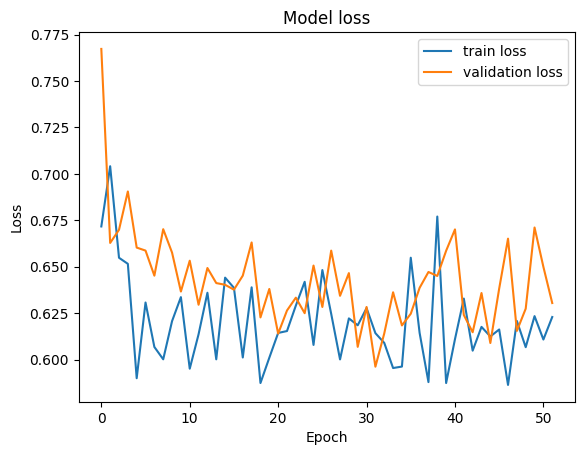

In [ ]:
plot_accuracy(history)
plot_loss(history)

In [ ]:
np_samples = len(test_generator.filenames)
test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)

<ipython-input-59-715e340fdd3c>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)


 3/60 [>.............................] - ETA: 2:12

60/60 [==============================] - 8s 80ms/step


In [ ]:
y_pred = [ 1 if y >= 0.5 else 0 for y in test_predictions]
y_true = test_generator.classes
class_indices = test_generator.class_indices
print(classification_report(y_true, y_pred, target_names=class_indices.keys()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.60      1.00      0.75        36

    accuracy                           0.60        60
   macro avg       0.30      0.50      0.37        60
weighted avg       0.36      0.60      0.45        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
y_pred = [ 1 if y >= 0.5 else 0 for y in test_predictions]
y_true = test_generator.labels
min_length = min(len(y_true), len(y_pred))
y_true = y_true[:min_length]
y_pred = y_pred[:min_length]
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.60      1.00      0.75        36

    accuracy                           0.60        60
   macro avg       0.30      0.50      0.37        60
weighted avg       0.36      0.60      0.45        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


---

# 3. EfficientNetB0
- optimizer : Adam
- learning rate : 0.001
- epochs : 46/100
- early stopping patience : 20

In [ ]:
# optimizer : 신경망의 가중치와 절편을 학습하기 위한 알고리즘 혹은 방법 / SGD,네스테로프 모멘텀, Adam 등등
optimizer = Adam(learning_rate=0.001)

# Xception : Xception은 71개 계층으로 구성된 컨벌루션 신경망. ImageNet 데이터베이스의 1백만 개가 넘는 영상에 대해 훈련된 신경망의 사전 훈련된 버전을 불러올 수 있음
base_model = EfficientNetB0(weights="imagenet", include_top=False, input_tensor=Input(shape=(IMGSIZE, IMGSIZE, 3)))
base_model.trainable = False


x = base_model.output
x = AveragePooling2D(pool_size=(5, 5))(x)
x = Dropout(0.2)(x) # 드롭아웃 : 과대적합 방지, 훈련이 끝난 뒤 평가 or 예측시에는 드롭아웃 적용 X
x = Flatten(name="flatten")(x) # flatten : 은닉층
outputs = Dense(1, activation="sigmoid")(x) # 이진분류일 경우, sigmoid

model = Model(inputs=base_model.input, outputs=outputs)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

16705208/16705208 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 256, 256, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 256, 256, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 256, 256, 3)          0         ['normalization[0][0]']   

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
reducelr = ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=0, factor=0.5)

In [ ]:
train_generator = cycle(train_generator)

history = model.fit(train_generator,
                    steps_per_epoch = len(X_train) // BATCH_SIZE,
                    validation_data = val_generator,
                    validation_steps= len(X_val) // BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=[reducelr, earlystop])

Epoch 1/100
9/9 [==============================] - 182s 22s/step - loss: 0.6894 - binary_accuracy: 0.5611 - val_loss: 0.7300 - val_binary_accuracy: 0.5500 - lr: 0.0010
Epoch 2/100
9/9 [==============================] - 23s 3s/step - loss: 0.6693 - binary_accuracy: 0.6221 - val_loss: 0.6955 - val_binary_accuracy: 0.5500 - lr: 0.0010
Epoch 3/100
9/9 [==============================] - 23s 3s/step - loss: 0.6783 - binary_accuracy: 0.5988 - val_loss: 0.7069 - val_binary_accuracy: 0.5000 - lr: 0.0010
Epoch 4/100
9/9 [==============================] - 23s 3s/step - loss: 0.6596 - binary_accuracy: 0.6453 - val_loss: 0.7030 - val_binary_accuracy: 0.5250 - lr: 5.0000e-04
Epoch 5/100
9/9 [==============================] - 23s 3s/step - loss: 0.6566 - binary_accuracy: 0.6279 - val_loss: 0.6989 - val_binary_accuracy: 0.5500 - lr: 2.5000e-04
Epoch 6/100
9/9 [==============================] - 23s 3s/step - loss: 0.6813 - binary_accuracy: 0.5988 - val_loss: 0.7129 - val_binary_accuracy: 0.5250 - lr: 1

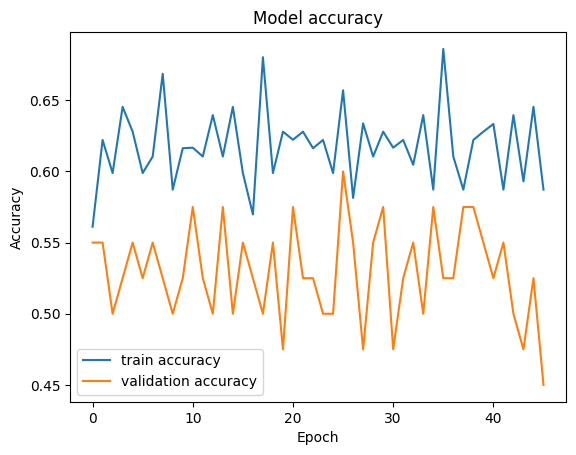

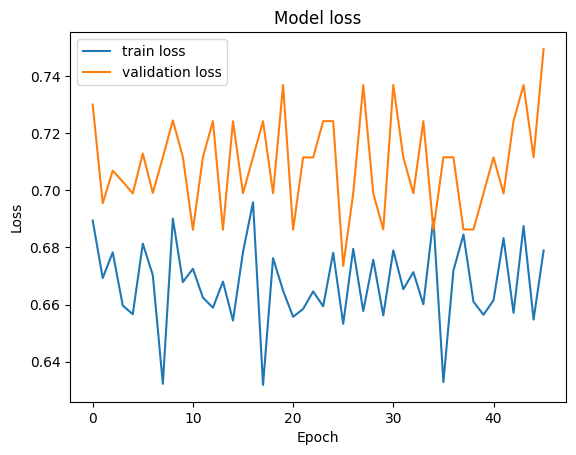

In [ ]:
plot_accuracy(history)
plot_loss(history)

In [ ]:
np_samples = len(test_generator.filenames)
test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)

<ipython-input-16-715e340fdd3c>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)


 3/60 [>.............................] - ETA: 2:26

60/60 [==============================] - 8s 89ms/step


In [ ]:
y_pred = [ 1 if y >= 0.5 else 0 for y in test_predictions]
y_true = test_generator.labels
min_length = min(len(y_true), len(y_pred))
y_true = y_true[:min_length]
y_pred = y_pred[:min_length]
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.60      1.00      0.75        36

    accuracy                           0.60        60
   macro avg       0.30      0.50      0.37        60
weighted avg       0.36      0.60      0.45        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


----
# EfficientNetB7


In [ ]:
IMGSIZE = 256
BATCH_SIZE = 20
EPOCHS = 200

# 훈련 데이터에 대한 데이터 증강 설정
train_datagen = ImageDataGenerator(
    rescale=1./256,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 테스트 데이터에 대한 전처리 (증강을 적용하지 않음)
test_datagen = ImageDataGenerator(rescale=1./256)

# 훈련 데이터 제너레이터 생성
train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 검증 데이터 제너레이터 생성 (증강을 적용하지 않음)
val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 테스트 데이터 제너레이터 생성 (증강을 적용하지 않음)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 192 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.
Found 60 validated image filenames belonging to 2 classes.


In [ ]:
optimizer = Adam(learning_rate=0.03)

base_model = EfficientNetB7(weights="imagenet", include_top=False, input_tensor=Input(shape=(IMGSIZE, IMGSIZE, 3)))
base_model.trainable = False


x = base_model.output
x = AveragePooling2D(pool_size=(5, 5))(x)
x = Dropout(0.5)(x)
x = Flatten(name="flatten")(x)
outputs = Dense(1, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=outputs)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])
model.summary()

258076736/258076736 [==============================] - 1s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 256, 256, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 256, 256, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)   

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
reducelr = ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=0, factor=0.5)

train_generator = cycle(train_generator)
history = model.fit(train_generator,
                    steps_per_epoch = len(X_train) // BATCH_SIZE,
                    validation_data = val_generator,
                    validation_steps= len(X_val) // BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=[reducelr, earlystop])

Epoch 1/200
9/9 [==============================] - 167s 17s/step - loss: 2.0636 - binary_accuracy: 0.4944 - val_loss: 2.3739 - val_binary_accuracy: 0.5750 - lr: 0.0300
Epoch 2/200
9/9 [==============================] - 33s 4s/step - loss: 1.0007 - binary_accuracy: 0.5640 - val_loss: 0.7653 - val_binary_accuracy: 0.5500 - lr: 0.0300
Epoch 3/200
9/9 [==============================] - 35s 4s/step - loss: 0.8651 - binary_accuracy: 0.5116 - val_loss: 0.6800 - val_binary_accuracy: 0.5500 - lr: 0.0300
Epoch 4/200
9/9 [==============================] - 33s 4s/step - loss: 0.8336 - binary_accuracy: 0.5291 - val_loss: 0.7303 - val_binary_accuracy: 0.4750 - lr: 0.0300
Epoch 5/200
9/9 [==============================] - 34s 4s/step - loss: 0.7555 - binary_accuracy: 0.5756 - val_loss: 0.6631 - val_binary_accuracy: 0.5750 - lr: 0.0150
Epoch 6/200
9/9 [==============================] - 35s 4s/step - loss: 0.8170 - binary_accuracy: 0.5174 - val_loss: 0.6686 - val_binary_accuracy: 0.5750 - lr: 0.0150
Ep

In [ ]:
def plot_accuracy(history):

    plt.plot(history.history['binary_accuracy'],label='train accuracy')
    plt.plot(history.history['val_binary_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

def plot_loss(history):

    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

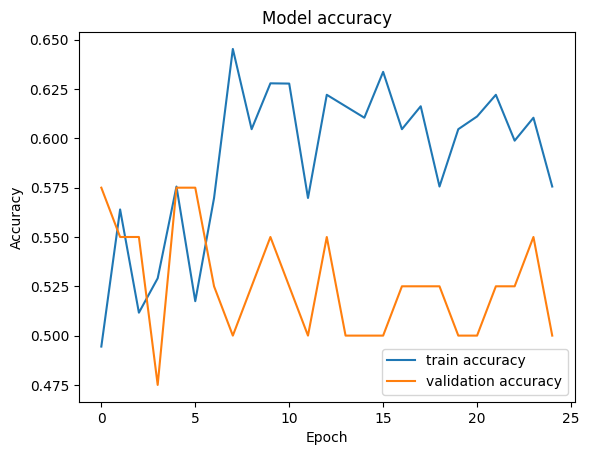

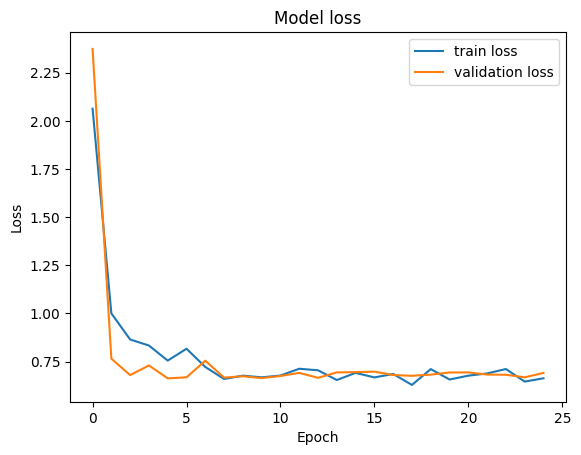

In [ ]:
plot_accuracy(history)
plot_loss(history)

In [ ]:
np_samples = len(test_generator.filenames)
test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)

y_pred = [ 1 if y >= 0.5 else 0 for y in test_predictions]
y_true = test_generator.labels
min_length = min(len(y_true), len(y_pred))
y_true = y_true[:min_length]
y_pred = y_pred[:min_length]
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

<ipython-input-12-3f7191567549>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)


 3/60 [>.............................] - ETA: 11:33

60/60 [==============================] - 34s 423ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.60      1.00      0.75        36

    accuracy                           0.60        60
   macro avg       0.30      0.50      0.37        60
weighted avg       0.36      0.60      0.45        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


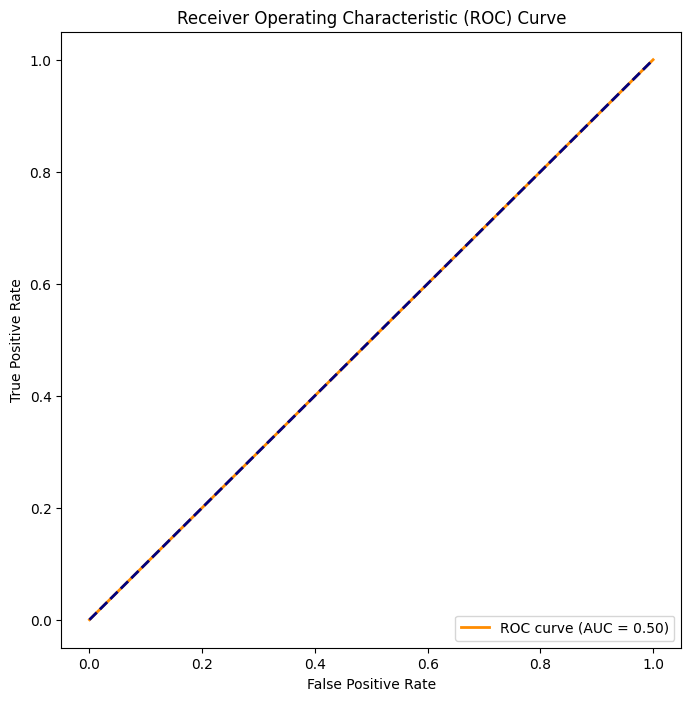

In [ ]:
# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

---

# 4. ResNet101
- optimizer : Adam
- learning rate : 0.001
- epochs : 100
- early stopping patience : 20

In [ ]:
optimizer = Adam(learning_rate=0.001)


base_model = ResNet101(weights="imagenet", include_top=False, input_tensor=Input(shape=(IMGSIZE, IMGSIZE, 3)))
base_model.trainable = False


x = base_model.output
x = AveragePooling2D(pool_size=(5, 5))(x)
x = Dropout(0.2)(x) # 드롭아웃 : 과대적합 방지, 훈련이 끝난 뒤 평가 or 예측시에는 드롭아웃 적용 X
x = Flatten(name="flatten")(x) # flatten : 은닉층
outputs = Dense(1, activation="sigmoid")(x) # 이진분류일 경우, sigmoid

model = Model(inputs=base_model.input, outputs=outputs)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

171446536/171446536 [==============================] - 5s 0us/step


In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
reducelr = ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=0, factor=0.5)

In [ ]:
train_generator = cycle(train_generator)

history = model.fit(train_generator,
                    steps_per_epoch = len(X_train) // BATCH_SIZE,
                    validation_data = val_generator,
                    validation_steps= len(X_val) // BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=[reducelr, earlystop])

Epoch 1/100
9/9 [==============================] - 38s 4s/step - loss: 0.6687 - binary_accuracy: 0.5778 - val_loss: 0.7176 - val_binary_accuracy: 0.4750 - lr: 0.0010
Epoch 2/100
9/9 [==============================] - 23s 3s/step - loss: 0.6565 - binary_accuracy: 0.6105 - val_loss: 0.6861 - val_binary_accuracy: 0.5250 - lr: 0.0010
Epoch 3/100
9/9 [==============================] - 23s 3s/step - loss: 0.6123 - binary_accuracy: 0.6337 - val_loss: 0.6894 - val_binary_accuracy: 0.5250 - lr: 0.0010
Epoch 4/100
9/9 [==============================] - 24s 3s/step - loss: 0.6340 - binary_accuracy: 0.6163 - val_loss: 0.6405 - val_binary_accuracy: 0.5500 - lr: 5.0000e-04
Epoch 5/100
9/9 [==============================] - 23s 3s/step - loss: 0.6186 - binary_accuracy: 0.6395 - val_loss: 0.6422 - val_binary_accuracy: 0.5250 - lr: 5.0000e-04
Epoch 6/100
9/9 [==============================] - 23s 3s/step - loss: 0.6380 - binary_accuracy: 0.6221 - val_loss: 0.6394 - val_binary_accuracy: 0.5500 - lr: 2.5

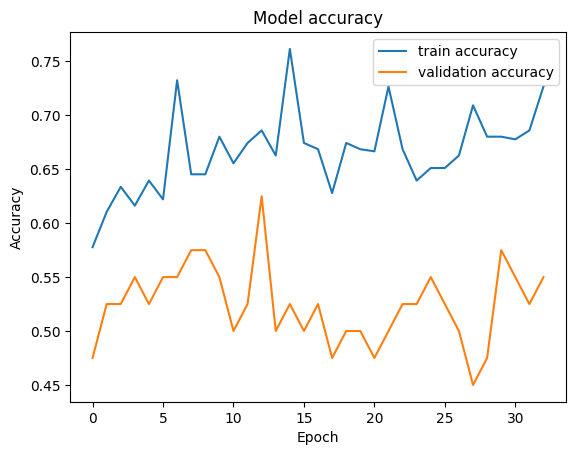

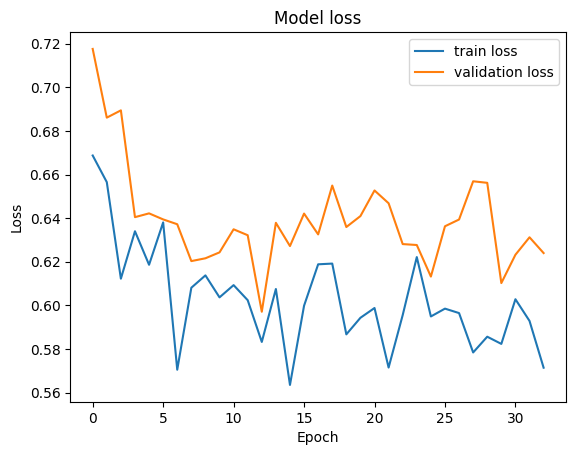

In [ ]:
plot_accuracy(history)
plot_loss(history)

In [ ]:
np_samples = len(test_generator.filenames)
test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)

<ipython-input-31-715e340fdd3c>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)


 3/60 [>.............................] - ETA: 2:24

60/60 [==============================] - 10s 88ms/step


In [ ]:
y_pred = [ 1 if y >= 0.5 else 0 for y in test_predictions]
y_true = test_generator.labels
min_length = min(len(y_true), len(y_pred))
y_true = y_true[:min_length]
y_pred = y_pred[:min_length]
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        24
           1       0.60      1.00      0.75        36

    accuracy                           0.60        60
   macro avg       0.30      0.50      0.37        60
weighted avg       0.36      0.60      0.45        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Assuming y_pred is the output of your model's prediction
predicted_classes = np.argmax(y_pred, axis=-1)
true_classes = test_generator.classes

predicted_classes = np.array(predicted_classes)
true_classes = np.array(true_classes)

incorrect_indices = np.nonzero(predicted_classes != true_classes)[0]

----

#  ResNet101
- optimizer : Adam
- learning rate : 0.3
- epochs : 200
- early stopping patience : 20

In [ ]:
IMGSIZE = 256
BATCH_SIZE = 20
EPOCHS = 200


train_datagen =  ImageDataGenerator(rescale=1. / 256)

train_generator = train_datagen.flow_from_dataframe(
            X_train,
            x_col='image path',
            y_col='label',
            target_size=(IMGSIZE, IMGSIZE),
            batch_size=BATCH_SIZE,
            class_mode='binary')

test_datagen = ImageDataGenerator(rescale=1./256)

val_generator =  test_datagen.flow_from_dataframe(
            X_val,
            x_col='image path',
            y_col='label',
            target_size=(IMGSIZE, IMGSIZE),
            batch_size=BATCH_SIZE,
            class_mode='binary')

test_generator =  test_datagen.flow_from_dataframe(
            X_test,
            x_col='image path',
            y_col='label',
            target_size=(IMGSIZE, IMGSIZE),
            batch_size=BATCH_SIZE,
            class_mode='binary')

Found 192 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.
Found 60 validated image filenames belonging to 2 classes.


In [ ]:
optimizer = Adam(learning_rate=0.03)


base_model = ResNet101(weights="imagenet", include_top=False, input_tensor=Input(shape=(IMGSIZE, IMGSIZE, 3)))
base_model.trainable = False


x = base_model.output
x = AveragePooling2D(pool_size=(5, 5))(x)
x = Dropout(0.2)(x) # 드롭아웃 : 과대적합 방지, 훈련이 끝난 뒤 평가 or 예측시에는 드롭아웃 적용 X
x = Dropout(0.5)(x)
x = Flatten(name="flatten")(x) # flatten : 은닉층
outputs = Dense(1, activation="sigmoid")(x) # 이진분류일 경우, sigmoid

model = Model(inputs=base_model.input, outputs=outputs)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
reducelr = ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=0, factor=0.5)

In [ ]:
train_generator = cycle(train_generator)

history = model.fit(train_generator,
                    steps_per_epoch = len(X_train) // BATCH_SIZE,
                    validation_data = val_generator,
                    validation_steps= len(X_val) // BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=[reducelr, earlystop])

Epoch 1/200
9/9 [==============================] - 37s 4s/step - loss: 1.3204 - binary_accuracy: 0.5444 - val_loss: 0.8632 - val_binary_accuracy: 0.5000 - lr: 0.0300
Epoch 2/200
9/9 [==============================] - 22s 3s/step - loss: 0.7444 - binary_accuracy: 0.6860 - val_loss: 0.5277 - val_binary_accuracy: 0.6000 - lr: 0.0300
Epoch 3/200
9/9 [==============================] - 23s 3s/step - loss: 0.6171 - binary_accuracy: 0.7209 - val_loss: 0.5106 - val_binary_accuracy: 0.6500 - lr: 0.0300
Epoch 4/200
9/9 [==============================] - 23s 3s/step - loss: 0.4991 - binary_accuracy: 0.8023 - val_loss: 0.4088 - val_binary_accuracy: 0.7750 - lr: 0.0300
Epoch 5/200
9/9 [==============================] - 24s 3s/step - loss: 0.3901 - binary_accuracy: 0.8140 - val_loss: 0.3960 - val_binary_accuracy: 0.8000 - lr: 0.0300
Epoch 6/200
9/9 [==============================] - 25s 3s/step - loss: 0.3877 - binary_accuracy: 0.8372 - val_loss: 0.2814 - val_binary_accuracy: 0.9500 - lr: 0.0300
Epoc

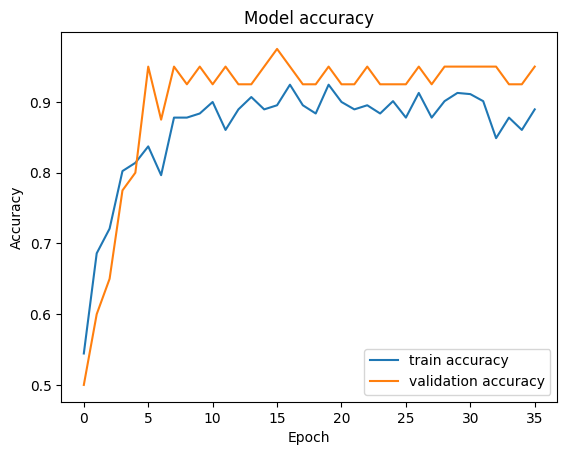

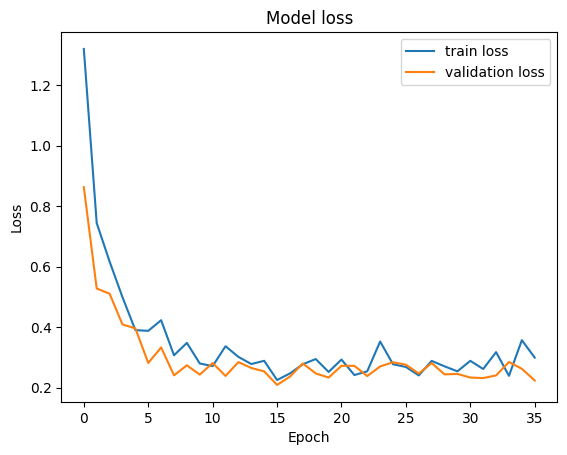

In [ ]:
plot_accuracy(history)
plot_loss(history)

In [ ]:
np_samples = len(test_generator.filenames)
test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)

<ipython-input-40-715e340fdd3c>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)


 3/60 [>.............................] - ETA: 2:19

60/60 [==============================] - 9s 86ms/step


In [ ]:
y_pred = [ 1 if y >= 0.5 else 0 for y in test_predictions]
y_true = test_generator.labels
min_length = min(len(y_true), len(y_pred))
y_true = y_true[:min_length]
y_pred = y_pred[:min_length]
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

              precision    recall  f1-score   support

           0       0.40      0.50      0.44        24
           1       0.60      0.50      0.55        36

    accuracy                           0.50        60
   macro avg       0.50      0.50      0.49        60
weighted avg       0.52      0.50      0.51        60



---
# 📌 train data에 대한 데이터 증강(data augmentation)을 설정한 뒤, ResNet101를 적용

In [ ]:
IMGSIZE = 256
BATCH_SIZE = 20
EPOCHS = 200

# 훈련 데이터에 대한 데이터 증강 설정
train_datagen = ImageDataGenerator(
    rescale=1./256,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 테스트 데이터에 대한 전처리 (증강을 적용하지 않음)
test_datagen = ImageDataGenerator(rescale=1./256)

# 훈련 데이터 제너레이터 생성
train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 검증 데이터 제너레이터 생성 (증강을 적용하지 않음)
val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 테스트 데이터 제너레이터 생성 (증강을 적용하지 않음)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 192 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.
Found 60 validated image filenames belonging to 2 classes.


In [ ]:
optimizer = Adam(learning_rate=0.03)


base_model = ResNet101(weights="imagenet", include_top=False, input_tensor=Input(shape=(IMGSIZE, IMGSIZE, 3)))
base_model.trainable = False


x = base_model.output
x = AveragePooling2D(pool_size=(5, 5))(x)
x = Dropout(0.2)(x) # 드롭아웃 : 과대적합 방지, 훈련이 끝난 뒤 평가 or 예측시에는 드롭아웃 적용 X
x = Dropout(0.5)(x)
x = Flatten(name="flatten")(x) # flatten : 은닉층
outputs = Dense(1, activation="sigmoid")(x) # 이진분류일 경우, sigmoid

model = Model(inputs=base_model.input, outputs=outputs)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

171446536/171446536 [==============================] - 5s 0us/step


In [ ]:
model.summary()


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
reducelr = ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=0, factor=0.5)

In [ ]:
train_generator = cycle(train_generator)

history = model.fit(train_generator,
                    steps_per_epoch = len(X_train) // BATCH_SIZE,
                    validation_data = val_generator,
                    validation_steps= len(X_val) // BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=[reducelr, earlystop])

Epoch 1/200
9/9 [==============================] - 39s 4s/step - loss: 1.1871 - binary_accuracy: 0.5667 - val_loss: 1.2444 - val_binary_accuracy: 0.5000 - lr: 0.0300
Epoch 2/200
9/9 [==============================] - 25s 3s/step - loss: 0.8834 - binary_accuracy: 0.6279 - val_loss: 0.5583 - val_binary_accuracy: 0.6750 - lr: 0.0300
Epoch 3/200
9/9 [==============================] - 26s 3s/step - loss: 0.7779 - binary_accuracy: 0.6337 - val_loss: 0.3756 - val_binary_accuracy: 0.9000 - lr: 0.0300
Epoch 4/200
9/9 [==============================] - 25s 3s/step - loss: 0.7109 - binary_accuracy: 0.6802 - val_loss: 0.4649 - val_binary_accuracy: 0.6750 - lr: 0.0300
Epoch 5/200
9/9 [==============================] - 26s 3s/step - loss: 0.6106 - binary_accuracy: 0.6860 - val_loss: 0.3920 - val_binary_accuracy: 0.9250 - lr: 0.0150
Epoch 6/200
9/9 [==============================] - 26s 3s/step - loss: 0.6275 - binary_accuracy: 0.7267 - val_loss: 0.3836 - val_binary_accuracy: 0.8750 - lr: 0.0075
Epoc

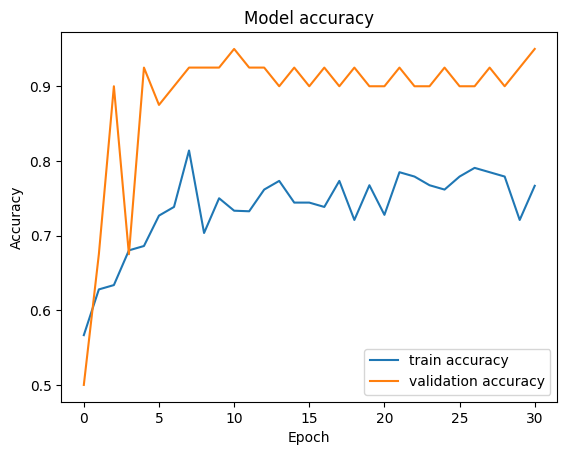

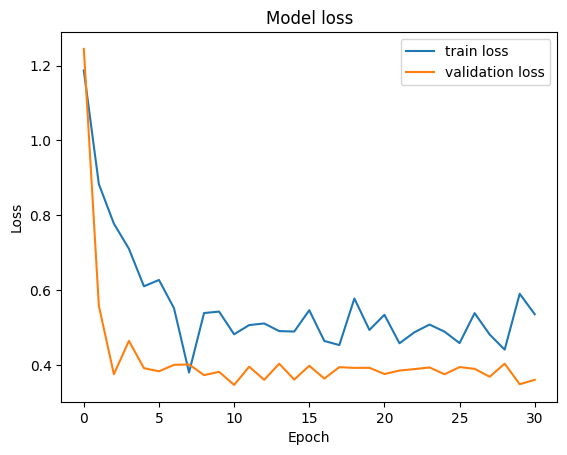

In [ ]:
plot_accuracy(history)
plot_loss(history)

In [ ]:
np_samples = len(test_generator.filenames)
test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)

<ipython-input-22-715e340fdd3c>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)


 3/60 [>.............................] - ETA: 2:32

60/60 [==============================] - 10s 93ms/step


In [ ]:
y_pred = [ 1 if y >= 0.5 else 0 for y in test_predictions]
y_true = test_generator.labels
min_length = min(len(y_true), len(y_pred))
y_true = y_true[:min_length]
y_pred = y_pred[:min_length]
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

              precision    recall  f1-score   support

           0       0.38      0.42      0.40        24
           1       0.59      0.56      0.57        36

    accuracy                           0.50        60
   macro avg       0.49      0.49      0.49        60
weighted avg       0.51      0.50      0.50        60



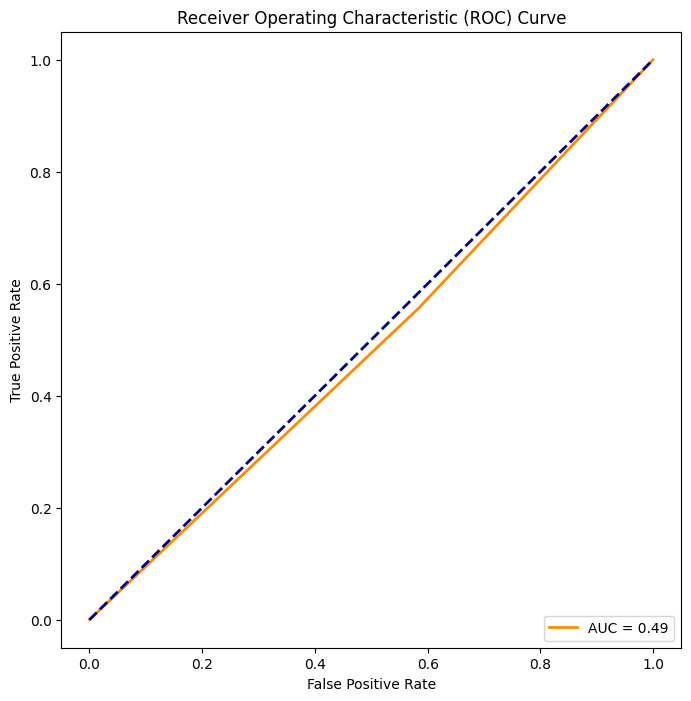

In [ ]:
# ROC 커브를 계산
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 커브 시각화
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

----
# 6.2 레이어 수정
- MaxPooling 사용

In [ ]:
IMGSIZE = 256
BATCH_SIZE = 20
EPOCHS = 200

# 훈련 데이터에 대한 데이터 증강 설정
train_datagen = ImageDataGenerator(
    rescale=1./256,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 테스트 데이터에 대한 전처리 (증강을 적용하지 않음)
test_datagen = ImageDataGenerator(rescale=1./256)

# 훈련 데이터 제너레이터 생성
train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 검증 데이터 제너레이터 생성 (증강을 적용하지 않음)
val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 테스트 데이터 제너레이터 생성 (증강을 적용하지 않음)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 192 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.
Found 60 validated image filenames belonging to 2 classes.


In [ ]:
optimizer = Adam(learning_rate=0.03)


base_model = ResNet101(weights="imagenet", include_top=False, input_tensor=Input(shape=(IMGSIZE, IMGSIZE, 3)))
base_model.trainable = False


x = base_model.output
x = MaxPooling2D(pool_size=(5, 5))(x)
x = Dropout(0.2)(x) # 드롭아웃 : 과대적합 방지, 훈련이 끝난 뒤 평가 or 예측시에는 드롭아웃 적용 X
x = Dropout(0.5)(x)
x = Flatten(name="flatten")(x) # flatten : 은닉층
outputs = Dense(1, activation="sigmoid")(x) # 이진분류일 경우, sigmoid

model = Model(inputs=base_model.input, outputs=outputs)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [ ]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_5[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
reducelr = ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=0, factor=0.5)

In [ ]:
train_generator = cycle(train_generator)

history = model.fit(train_generator,
                    steps_per_epoch = len(X_train) // BATCH_SIZE,
                    validation_data = val_generator,
                    validation_steps= len(X_val) // BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=[reducelr, earlystop])

Epoch 1/200
9/9 [==============================] - 39s 4s/step - loss: 2.4337 - binary_accuracy: 0.6111 - val_loss: 1.4572 - val_binary_accuracy: 0.6000 - lr: 0.0300
Epoch 2/200
9/9 [==============================] - 24s 3s/step - loss: 2.3430 - binary_accuracy: 0.6395 - val_loss: 0.6590 - val_binary_accuracy: 0.6750 - lr: 0.0300
Epoch 3/200
9/9 [==============================] - 25s 3s/step - loss: 1.6014 - binary_accuracy: 0.7500 - val_loss: 0.5057 - val_binary_accuracy: 0.8000 - lr: 0.0300
Epoch 4/200
9/9 [==============================] - 25s 3s/step - loss: 1.2959 - binary_accuracy: 0.7442 - val_loss: 0.4756 - val_binary_accuracy: 0.8000 - lr: 0.0300
Epoch 5/200
9/9 [==============================] - 25s 3s/step - loss: 1.5748 - binary_accuracy: 0.7558 - val_loss: 0.3438 - val_binary_accuracy: 0.9250 - lr: 0.0300
Epoch 6/200
9/9 [==============================] - 25s 3s/step - loss: 1.0715 - binary_accuracy: 0.7849 - val_loss: 0.2224 - val_binary_accuracy: 0.9250 - lr: 0.0300
Epoc

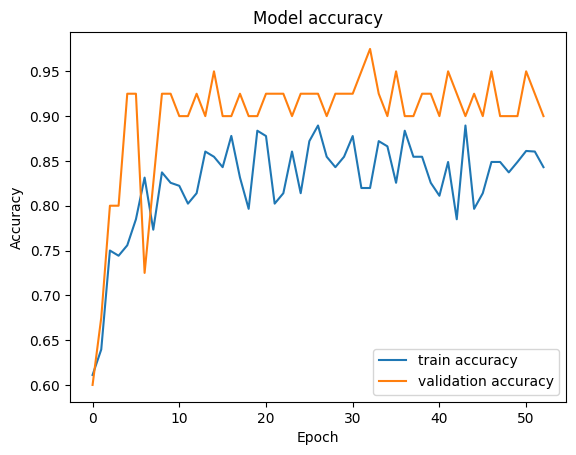

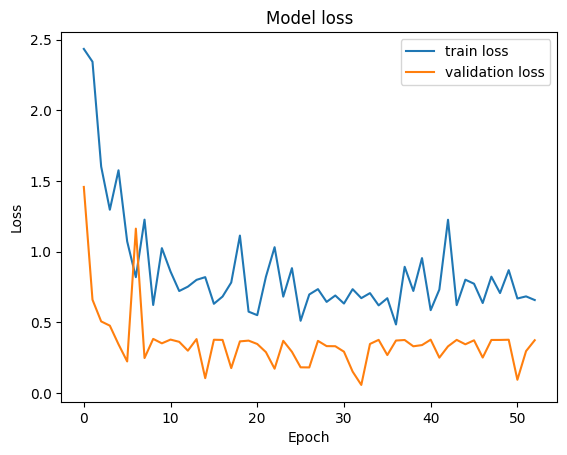

In [ ]:
plot_accuracy(history)
plot_loss(history)

In [ ]:
np_samples = len(test_generator.filenames)
test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)

<ipython-input-70-715e340fdd3c>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)


 3/60 [>.............................] - ETA: 2:19

60/60 [==============================] - 9s 86ms/step


In [ ]:
y_pred = [ 1 if y >= 0.5 else 0 for y in test_predictions]
y_true = test_generator.labels
min_length = min(len(y_true), len(y_pred))
y_true = y_true[:min_length]
y_pred = y_pred[:min_length]
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

              precision    recall  f1-score   support

           0       0.36      0.38      0.37        24
           1       0.57      0.56      0.56        36

    accuracy                           0.48        60
   macro avg       0.47      0.47      0.47        60
weighted avg       0.49      0.48      0.48        60



----
# 데이터 증강 + ResNet152

In [ ]:
IMGSIZE = 256
BATCH_SIZE = 20
EPOCHS = 200

# 훈련 데이터에 대한 데이터 증강 설정
train_datagen = ImageDataGenerator(
    rescale=1./256,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 테스트 데이터에 대한 전처리 (증강을 적용하지 않음)
test_datagen = ImageDataGenerator(rescale=1./256)

# 훈련 데이터 제너레이터 생성
train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 검증 데이터 제너레이터 생성 (증강을 적용하지 않음)
val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 테스트 데이터 제너레이터 생성 (증강을 적용하지 않음)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 192 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.
Found 60 validated image filenames belonging to 2 classes.


In [ ]:
optimizer = Adam(learning_rate=0.03)


base_model = ResNet152(weights="imagenet", include_top=False, input_tensor=Input(shape=(IMGSIZE, IMGSIZE, 3)))
base_model.trainable = False


x = base_model.output
x = AveragePooling2D(pool_size=(5, 5))(x)
x = Dropout(0.2)(x) # 드롭아웃 : 과대적합 방지, 훈련이 끝난 뒤 평가 or 예측시에는 드롭아웃 적용 X
x = Dropout(0.5)(x)
x = Flatten(name="flatten")(x) # flatten : 은닉층
outputs = Dense(1, activation="sigmoid")(x) # 이진분류일 경우, sigmoid

model = Model(inputs=base_model.input, outputs=outputs)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

234698864/234698864 [==============================] - 9s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
reducelr = ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=0, factor=0.5)

In [ ]:
train_generator = cycle(train_generator)

history = model.fit(train_generator,
                    steps_per_epoch = len(X_train) // BATCH_SIZE,
                    validation_data = val_generator,
                    validation_steps= len(X_val) // BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=[reducelr, earlystop])

Epoch 1/200
9/9 [==============================] - 209s 25s/step - loss: 0.9749 - binary_accuracy: 0.5000 - val_loss: 0.5812 - val_binary_accuracy: 0.7250 - lr: 0.0300
Epoch 2/200
9/9 [==============================] - 22s 3s/step - loss: 0.7254 - binary_accuracy: 0.6105 - val_loss: 0.5971 - val_binary_accuracy: 0.5750 - lr: 0.0300
Epoch 3/200
9/9 [==============================] - 25s 3s/step - loss: 0.6279 - binary_accuracy: 0.6570 - val_loss: 0.5163 - val_binary_accuracy: 0.7500 - lr: 0.0150
Epoch 4/200
9/9 [==============================] - 25s 3s/step - loss: 0.5787 - binary_accuracy: 0.6802 - val_loss: 0.4682 - val_binary_accuracy: 0.8750 - lr: 0.0150
Epoch 5/200
9/9 [==============================] - 25s 3s/step - loss: 0.4676 - binary_accuracy: 0.7558 - val_loss: 0.4533 - val_binary_accuracy: 0.9000 - lr: 0.0150
Epoch 6/200
9/9 [==============================] - 25s 3s/step - loss: 0.5728 - binary_accuracy: 0.6686 - val_loss: 0.5688 - val_binary_accuracy: 0.4750 - lr: 0.0150
Ep

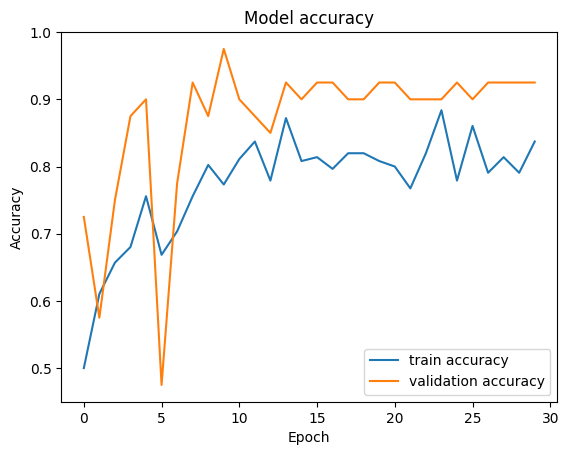

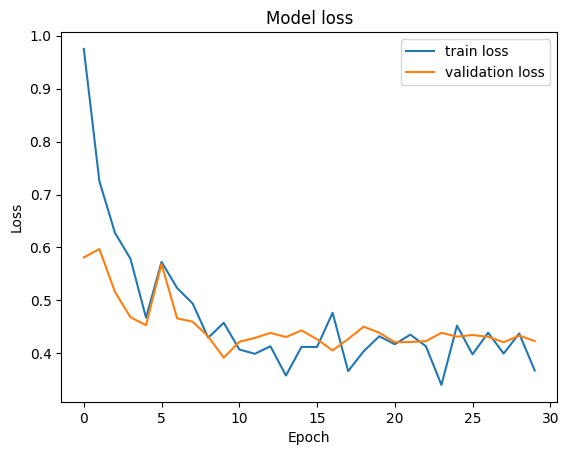

In [ ]:
def plot_accuracy(history):

    plt.plot(history.history['binary_accuracy'],label='train accuracy')
    plt.plot(history.history['val_binary_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

def plot_loss(history):

    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

plot_accuracy(history)
plot_loss(history)

In [ ]:
np_samples = len(test_generator.filenames)
test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)

<ipython-input-12-715e340fdd3c>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)


 3/60 [>.............................] - ETA: 16:29

60/60 [==============================] - 40s 592ms/step


In [ ]:
y_pred = [ 1 if y >= 0.5 else 0 for y in test_predictions]
y_true = test_generator.labels
min_length = min(len(y_true), len(y_pred))
y_true = y_true[:min_length]
y_pred = y_pred[:min_length]
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

              precision    recall  f1-score   support

           0       0.39      0.46      0.42        24
           1       0.59      0.53      0.56        36

    accuracy                           0.50        60
   macro avg       0.49      0.49      0.49        60
weighted avg       0.51      0.50      0.50        60



----
Epochs 늘려서

In [ ]:
IMGSIZE = 256
BATCH_SIZE = 20
EPOCHS = 500

# 훈련 데이터에 대한 데이터 증강 설정
train_datagen = ImageDataGenerator(
    rescale=1./256,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 테스트 데이터에 대한 전처리 (증강을 적용하지 않음)
test_datagen = ImageDataGenerator(rescale=1./256)

# 훈련 데이터 제너레이터 생성
train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 검증 데이터 제너레이터 생성 (증강을 적용하지 않음)
val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 테스트 데이터 제너레이터 생성 (증강을 적용하지 않음)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 192 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.
Found 60 validated image filenames belonging to 2 classes.


In [ ]:
optimizer = Adam(learning_rate=0.03)


base_model = ResNet152(weights="imagenet", include_top=False, input_tensor=Input(shape=(IMGSIZE, IMGSIZE, 3)))
base_model.trainable = False


x = base_model.output
x = AveragePooling2D(pool_size=(5, 5))(x)
x = Dropout(0.2)(x) # 드롭아웃 : 과대적합 방지, 훈련이 끝난 뒤 평가 or 예측시에는 드롭아웃 적용 X
x = Dropout(0.5)(x)
x = Flatten(name="flatten")(x) # flatten : 은닉층
outputs = Dense(1, activation="sigmoid")(x) # 이진분류일 경우, sigmoid

model = Model(inputs=base_model.input, outputs=outputs)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                        

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', patience=50, verbose=1)
reducelr = ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=0, factor=0.5)

In [ ]:
train_generator = cycle(train_generator)

history = model.fit(train_generator,
                    steps_per_epoch = len(X_train) // BATCH_SIZE,
                    validation_data = val_generator,
                    validation_steps= len(X_val) // BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=[reducelr, earlystop])

Epoch 1/500
9/9 [==============================] - 30s 4s/step - loss: 0.3381 - binary_accuracy: 0.8605 - val_loss: 0.3460 - val_binary_accuracy: 0.9250 - lr: 9.1553e-07
Epoch 2/500
9/9 [==============================] - 21s 3s/step - loss: 0.3150 - binary_accuracy: 0.8605 - val_loss: 0.3473 - val_binary_accuracy: 0.9500 - lr: 9.1553e-07
Epoch 3/500
9/9 [==============================] - 24s 3s/step - loss: 0.3248 - binary_accuracy: 0.8895 - val_loss: 0.3495 - val_binary_accuracy: 0.9250 - lr: 9.1553e-07
Epoch 4/500
9/9 [==============================] - 24s 3s/step - loss: 0.3420 - binary_accuracy: 0.8488 - val_loss: 0.3495 - val_binary_accuracy: 0.9250 - lr: 9.1553e-07
Epoch 5/500
9/9 [==============================] - 25s 3s/step - loss: 0.3539 - binary_accuracy: 0.8333 - val_loss: 0.3141 - val_binary_accuracy: 0.9750 - lr: 9.1553e-07
Epoch 6/500
9/9 [==============================] - 24s 3s/step - loss: 0.3266 - binary_accuracy: 0.8779 - val_loss: 0.3691 - val_binary_accuracy: 0.92

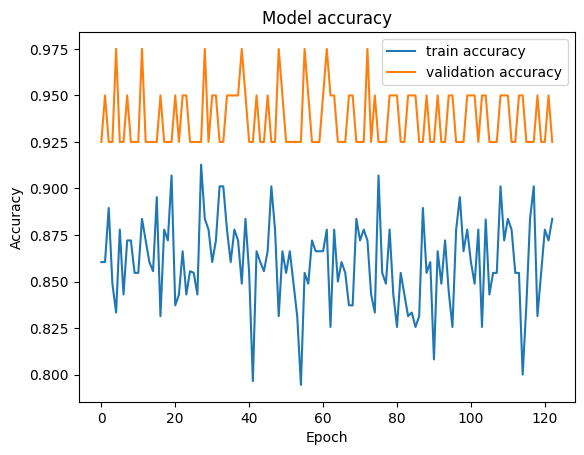

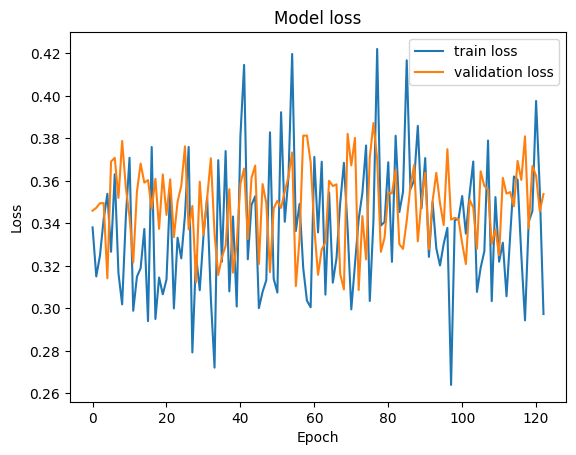

In [ ]:
plot_accuracy(history)
plot_loss(history)

In [ ]:
np_samples = len(test_generator.filenames)
test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)

<ipython-input-25-715e340fdd3c>:2: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)


 3/60 [>.............................] - ETA: 2:01

60/60 [==============================] - 7s 74ms/step


In [ ]:
y_pred = [ 1 if y >= 0.5 else 0 for y in test_predictions]
y_true = test_generator.labels
min_length = min(len(y_true), len(y_pred))
y_true = y_true[:min_length]
y_pred = y_pred[:min_length]
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

              precision    recall  f1-score   support

           0       0.30      0.33      0.31        24
           1       0.52      0.47      0.49        36

    accuracy                           0.42        60
   macro avg       0.41      0.40      0.40        60
weighted avg       0.43      0.42      0.42        60



# Xception

In [ ]:
IMGSIZE = 256
BATCH_SIZE = 20
EPOCHS = 100

# 훈련 데이터에 대한 데이터 증강 설정
train_datagen = ImageDataGenerator(
    rescale=1./256,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 테스트 데이터에 대한 전처리 (증강을 적용하지 않음)
test_datagen = ImageDataGenerator(rescale=1./256)

# 훈련 데이터 제너레이터 생성
train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 검증 데이터 제너레이터 생성 (증강을 적용하지 않음)
val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 테스트 데이터 제너레이터 생성 (증강을 적용하지 않음)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 192 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.
Found 60 validated image filenames belonging to 2 classes.


In [ ]:
optimizer = Adam(learning_rate=0.03)

model = Xception(weights="imagenet", include_top=False,input_tensor=Input(shape=(IMGSIZE, IMGSIZE, 3)))
model.trainable = False

x = model.output
x = AveragePooling2D(pool_size=(5,5))(x)
x = Dropout(0.2)(x)
x = Flatten(name="flatten")(x)
outputs = Dense(1, activation="sigmoid")(x)


model = Model(inputs=model.input, outputs=outputs, name="Xception_1")

model.compile(optimizer=optimizer,loss='binary_crossentropy', metrics=['binary_accuracy'])

83683744/83683744 [==============================] - 3s 0us/step


In [ ]:
model.summary()

Model: "Xception_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 block1_conv1 (Conv2D)       (None, 127, 127, 32)         864       ['input_1[0][0]']             
                                                                                                  
 block1_conv1_bn (BatchNorm  (None, 127, 127, 32)         128       ['block1_conv1[0][0]']        
 alization)                                                                                       
                                                                                                  
 block1_conv1_act (Activati  (None, 127, 127, 32)         0         ['block1_conv1_bn[0][

In [ ]:
earlystop = EarlyStopping(monitor='val_loss', patience=20, verbose=1)
reducelr = ReduceLROnPlateau(monitor='val_loss', patience=1, verbose=0, factor=0.5)

In [ ]:
train_generator = cycle(train_generator)

history = model.fit(train_generator,
                    steps_per_epoch = len(X_train) // BATCH_SIZE,
                    validation_data = val_generator,
                    validation_steps= len(X_val) // BATCH_SIZE,
                    epochs=EPOCHS,
                    callbacks=[reducelr, earlystop])

Epoch 1/100
9/9 [==============================] - 176s 21s/step - loss: 0.2103 - binary_accuracy: 0.9128 - val_loss: 0.4276 - val_binary_accuracy: 0.8250 - lr: 0.0300
Epoch 2/100
9/9 [==============================] - 27s 3s/step - loss: 0.1188 - binary_accuracy: 0.9556 - val_loss: 0.0441 - val_binary_accuracy: 0.9750 - lr: 0.0300
Epoch 3/100
9/9 [==============================] - 26s 3s/step - loss: 0.0641 - binary_accuracy: 0.9767 - val_loss: 0.1585 - val_binary_accuracy: 0.9750 - lr: 0.0300
Epoch 4/100
9/9 [==============================] - 26s 3s/step - loss: 0.0150 - binary_accuracy: 0.9942 - val_loss: 0.3602 - val_binary_accuracy: 0.9250 - lr: 0.0150
Epoch 5/100
9/9 [==============================] - 26s 3s/step - loss: 0.0201 - binary_accuracy: 0.9942 - val_loss: 0.3033 - val_binary_accuracy: 0.9500 - lr: 0.0075
Epoch 6/100
9/9 [==============================] - 27s 3s/step - loss: 0.0188 - binary_accuracy: 0.9942 - val_loss: 0.1251 - val_binary_accuracy: 0.9750 - lr: 0.0037
Ep

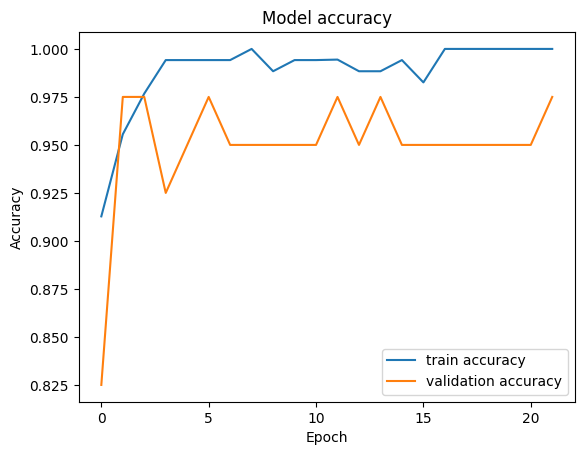

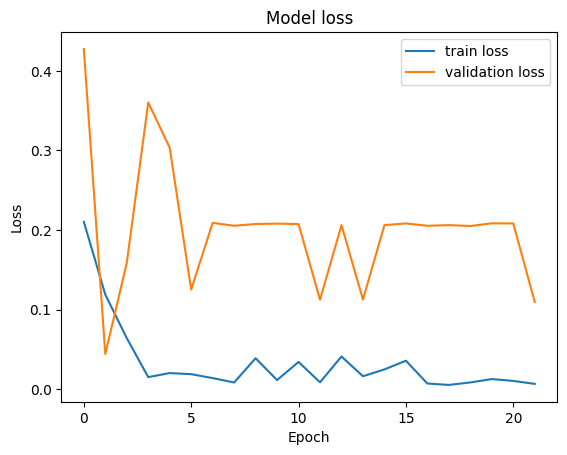

In [ ]:
def plot_accuracy(history):

    plt.plot(history.history['binary_accuracy'],label='train accuracy')
    plt.plot(history.history['val_binary_accuracy'],label='validation accuracy')
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

def plot_loss(history):

    plt.plot(history.history['loss'],label="train loss")
    plt.plot(history.history['val_loss'],label="validation loss")
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')
    plt.show()

plot_accuracy(history)
plot_loss(history)

In [ ]:
y_pred = model.predict_generator(test_generator)
y_pred_binary = [1 if y >= 0.5 else 0 for y in y_pred]
y_true = test_generator.classes
class_names = list(test_generator.class_indices.keys())
print(classification_report(y_true, y_pred_binary, target_names=class_names))

<ipython-input-17-d0f633024e7c>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(test_generator)


              precision    recall  f1-score   support

           0       0.46      0.46      0.46        24
           1       0.64      0.64      0.64        36

    accuracy                           0.57        60
   macro avg       0.55      0.55      0.55        60
weighted avg       0.57      0.57      0.57        60



In [ ]:
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_true, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
auc_keras

0.6238425925925927

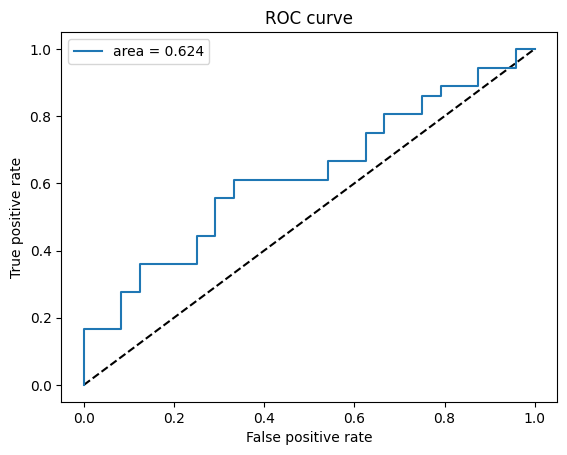

In [ ]:
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='area = {:.3f}'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

----
# 앙상블 - ResNet101

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
K.clear_session()

In [ ]:
IMGSIZE = 256
BATCH_SIZE = 20
EPOCHS = 100

# 훈련 데이터에 대한 데이터 증강 설정
train_datagen = ImageDataGenerator(
    rescale=1./256,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 테스트 데이터에 대한 전처리 (증강을 적용하지 않음)
test_datagen = ImageDataGenerator(rescale=1./256)

# 훈련 데이터 제너레이터 생성
train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 검증 데이터 제너레이터 생성 (증강을 적용하지 않음)
val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 테스트 데이터 제너레이터 생성 (증강을 적용하지 않음)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 192 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.
Found 60 validated image filenames belonging to 2 classes.


In [ ]:
# 앙상블할 모델 개수
num_models = 3

# 앙상블할 모델 개수만큼 반복
ensemble_models = []
for i in range(num_models):
    # ResNet101 모델 생성
    base_model = ResNet101(weights="imagenet", include_top=False, input_tensor=Input(shape=(IMGSIZE, IMGSIZE, 3)))
    base_model.trainable = False

    # 모델 아키텍처 수정
    x = base_model.output
    x = AveragePooling2D(pool_size=(5, 5))(x)
    x = Dropout(0.2)(x)
    x = Dropout(0.5)(x)
    x = Flatten(name="flatten")(x)
    outputs = Dense(1, activation="sigmoid")(x)

    # 수정된 모델 생성
    model = Model(inputs=base_model.input, outputs=outputs)

    # 모델 컴파일
    optimizer = Adam(learning_rate=0.03)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

    # 훈련 데이터 제너레이터 설정
    train_generator = cycle(train_generator)

    # 훈련
    history = model.fit(train_generator,
                        steps_per_epoch=len(X_train) // BATCH_SIZE,
                        validation_data=val_generator,
                        validation_steps=len(X_val) // BATCH_SIZE,
                        epochs=EPOCHS,
                        callbacks=[ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=0, factor=0.5),
                                   EarlyStopping(monitor='val_loss', patience=20, verbose=1)])

    # 훈련된 모델 저장
    ensemble_models.append(model)

# 앙상블 모델의 예측 결과를 저장할 리스트
ensemble_predictions = []

# 각 모델의 예측을 리스트에 추가
for i, model in enumerate(ensemble_models):
    y_pred = model.predict_generator(val_generator)
    y_pred_binary = (y_pred >= 0.5).astype(int)
    ensemble_predictions.append(y_pred_binary)

# 예측 결과를 평균 또는 다수결로 결합
final_predictions = np.mean(ensemble_predictions, axis=0)
final_predictions_binary = (final_predictions >= 0.5).astype(int)

# 실제 정답과 앙상블 모델의 예측 비교
y_true = val_generator.classes
accuracy = accuracy_score(y_true, final_predictions_binary)
print("Ensemble Model Accuracy:", accuracy)



Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


9/9 [==============================] - 30s 4s/step - loss: 1.1362 - binary_accuracy: 0.5233 - val_loss: 1.2018 - val_binary_accuracy: 0.4750 - lr: 0.0300
Epoch 2/100
9/9 [==============================] - 23s 3s/step - loss: 1.0117 - binary_accuracy: 0.5465 - val_loss: 0.5689 - val_binary_accuracy: 0.6250 - lr: 0.0300
Epoch 3/100
9/9 [==============================] - 25s 3s/step - loss: 0.6907 - binary_accuracy: 0.6919 - val_loss: 0.4663 - val_binary_accuracy: 0.7750 - lr: 0.0300
Epoch 4/100
9/9 [==============================] - 26s 3s/step - loss: 0.6751 - binary_accuracy: 0.6686 - val_loss: 0.5351 - val_binary_accuracy: 0.6750 - lr: 0.0300
Epoch 5/100
9/9 [==============================] - 25s 3s/step - loss: 0.6321 - binary_accuracy: 0.7267 - val_loss: 0.6272 - val_binary_accuracy: 0.5250 - lr: 0.0300
Epoch 6/100
9/9 [==============================] - 25s 3s/step - loss: 0.4615 - binary_accuracy: 0.7791 - val_loss: 0.3890 - val_binary_accuracy: 0.8500 - lr: 0.0300
Epoch 7/100
9/9 

<ipython-input-25-9229490003c9>:46: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(val_generator)


Ensemble Model Accuracy: 0.5


In [ ]:
# Confusion Matrix 생성
conf_mat = confusion_matrix(y_true, final_predictions_binary)
print("Confusion Matrix:")
print(conf_mat)

Confusion Matrix:
[[ 8 15]
 [ 9 16]]


- True Positive (TP): 16 (실제 Positive 중에서 정확히 Positive로 예측한 경우)
- True Negative (TN): 8 (실제 Negative 중에서 정확히 Negative로 예측한 경우)
- False Positive (FP): 15 (실제 Negative 중에서 잘못해서 Positive로 예측한 경우)
- False Negative (FN): 9 (실제 Positive 중에서 잘못해서 Negative로 예측한 경우)




- 정확도 (Accuracy): (8 + 16) / (8 + 15 + 9 + 16) ≈ 0.48
- 정밀도 (Precision): 16 / (16 + 15) ≈ 0.5161
- 재현율 (Recall): 16 / (16 + 9) ≈ 0.64
- F1 점수 (F1 Score): 2 * (0.5161 * 0.64) / (0.5161 + 0.64) ≈ 0.5708



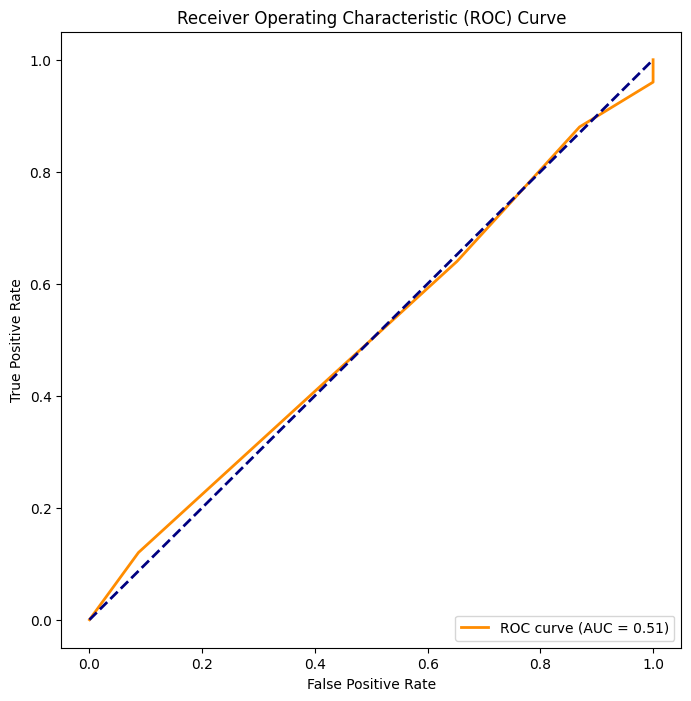

In [ ]:
# ROC Curve 및 AUC 계산
fpr, tpr, thresholds = roc_curve(y_true, final_predictions)
roc_auc = auc(fpr, tpr)

# ROC Curve 그리기
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
np_samples = len(test_generator.filenames)
test_predictions = model.predict_generator(test_generator, steps = np_samples, verbose=1)

# 앙상블 - Xception

In [ ]:
IMGSIZE = 256
BATCH_SIZE = 20
EPOCHS = 100

# 훈련 데이터에 대한 데이터 증강 설정
train_datagen = ImageDataGenerator(
    rescale=1./256,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 테스트 데이터에 대한 전처리 (증강을 적용하지 않음)
test_datagen = ImageDataGenerator(rescale=1./256)

# 훈련 데이터 제너레이터 생성
train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 검증 데이터 제너레이터 생성 (증강을 적용하지 않음)
val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 테스트 데이터 제너레이터 생성 (증강을 적용하지 않음)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 192 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.
Found 60 validated image filenames belonging to 2 classes.


In [ ]:
# 앙상블할 모델 개수
num_models = 3

# 앙상블할 모델 개수만큼 반복
ensemble_models = []
for i in range(num_models):
    # ResNet101 모델 생성
    base_model = Xception(weights="imagenet", include_top=False, input_tensor=Input(shape=(IMGSIZE, IMGSIZE, 3)))
    base_model.trainable = False

    # 모델 아키텍처 수정
    x = base_model.output
    x = AveragePooling2D(pool_size=(5, 5))(x)
    x = Dropout(0.2)(x)
    x = Dropout(0.5)(x)
    x = Flatten(name="flatten")(x)
    outputs = Dense(1, activation="sigmoid")(x)

    # 수정된 모델 생성
    model = Model(inputs=base_model.input, outputs=outputs)

    # 모델 컴파일
    optimizer = Adam(learning_rate=0.03)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['binary_accuracy'])

    # 훈련 데이터 제너레이터 설정
    train_generator = cycle(train_generator)

    # 훈련
    history = model.fit(train_generator,
                        steps_per_epoch=len(X_train) // BATCH_SIZE,
                        validation_data=val_generator,
                        validation_steps=len(X_val) // BATCH_SIZE,
                        epochs=EPOCHS,
                        callbacks=[ReduceLROnPlateau(monitor='val_loss', patience=5, verbose=0, factor=0.5),
                                   EarlyStopping(monitor='val_loss', patience=20, verbose=1)])

    # 훈련된 모델 저장
    ensemble_models.append(model)

# 앙상블 모델의 예측 결과를 저장할 리스트
ensemble_predictions = []

# 각 모델의 예측을 리스트에 추가
for i, model in enumerate(ensemble_models):
    y_pred = model.predict_generator(val_generator)
    y_pred_binary = (y_pred >= 0.5).astype(int)
    ensemble_predictions.append(y_pred_binary)

# 예측 결과를 평균 또는 다수결로 결합
final_predictions = np.mean(ensemble_predictions, axis=0)
final_predictions_binary = (final_predictions >= 0.5).astype(int)

# 실제 정답과 앙상블 모델의 예측 비교
y_true = val_generator.classes
accuracy = accuracy_score(y_true, final_predictions_binary)
print("Ensemble Model Accuracy:", accuracy)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


9/9 [==============================] - 58s 7s/step - loss: 0.3974 - binary_accuracy: 0.8111 - val_loss: 0.3069 - val_binary_accuracy: 0.8750 - lr: 0.0300
Epoch 2/100
9/9 [==============================] - 22s 3s/step - loss: 0.1856 - binary_accuracy: 0.9302 - val_loss: 0.5224 - val_binary_accuracy: 0.8750 - lr: 0.0300
Epoch 3/100
9/9 [==============================] - 25s 3s/step - loss: 0.1421 - binary_accuracy: 0.9593 - val_loss: 0.1749 - val_binary_accuracy: 0.9250 - lr: 0.0300
Epoch 4/100
9/9 [==============================] - 26s 3s/step - loss: 0.1719 - binary_accuracy: 0.9360 - val_loss: 0.2563 - val_binary_accuracy: 0.9500 - lr: 0.0300
Epoch 5/100
9/9 [==============================] - 25s 3s/step - loss: 0.0907 - binary_accuracy: 0.9767 - val_loss: 0.0857 - val_binary_accuracy: 0.9750 - lr: 0.0300
Epoch 6/100
9/9 [==============================] - 25s 3s/step - loss: 0.0503 - binary_accuracy: 0.9767 - val_loss: 0.1419 - val_binary_accuracy: 0.9500 - lr: 0.0300
Epoch 7/100
9/9 

<ipython-input-11-74874b3597b3>:46: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  y_pred = model.predict_generator(val_generator)


Ensemble Model Accuracy: 0.5416666666666666


In [ ]:
# 각 모델의 예측을 리스트에 추가
for i, model in enumerate(ensemble_models):
    y_pred = model.predict_generator(val_generator)
    y_pred_binary = (y_pred >= 0.5).astype(int)
    ensemble_predictions.append(y_pred_binary)

# 예측 결과를 평균 또는 다수결로 결합
final_predictions = np.mean(ensemble_predictions, axis=0)
final_predictions_binary = (final_predictions >= 0.5).astype(int)

# 실제 정답과 앙상블 모델의 예측 비교
y_true = val_generator.classes
accuracy = accuracy_score(y_true, final_predictions_binary)
print("Ensemble Model Accuracy:", accuracy)

In [ ]:
# Confusion Matrix 생성
conf_mat = confusion_matrix(y_true, final_predictions_binary)
print("Confusion Matrix:")
print(conf_mat)

Confusion Matrix:
[[12 11]
 [11 14]]


- True Positive (TP): 14
- False Positive (FP): 11
- False Negative (FN): 11
- True Negative (TN): 12


- 정확도 = (TP + TN) / (TP + FP + FN + TN) = (14 + 12) / (12 + 11 + 11 + 14)  =26 / 48 ≈ 0.5417
- 정밀도 = TP / (TP + FP) = 14 / (14 + 11) ≈ 0.5600
- 재현율 = TP / (TP + FN) = 14 / (14 + 11) ≈ 0.5600
- F1 = 2 * (정밀도 * 재현율) / (정밀도 + 재현율) = 2 * (0.5600 * 0.5600) / (0.5600 + 0.5600) ≈ 0.5600

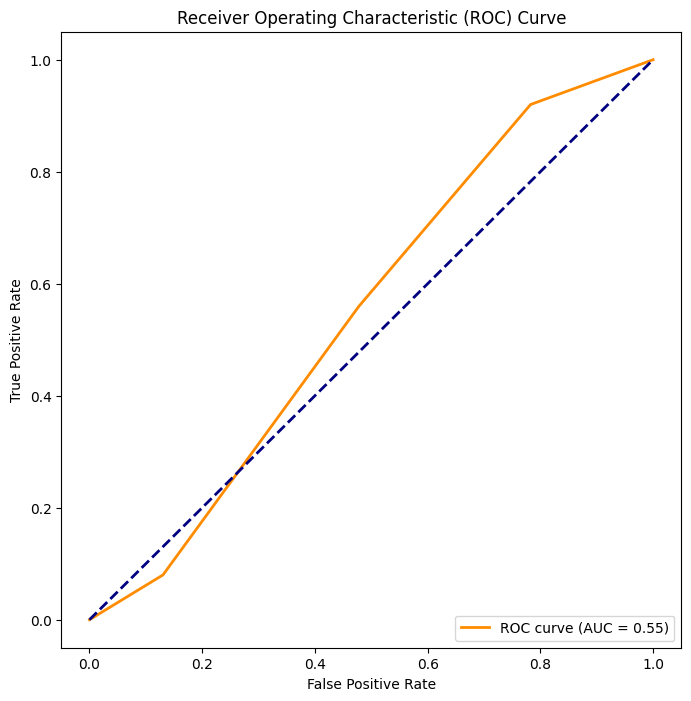

In [ ]:
# ROC Curve 및 AUC 계산
fpr, tpr, thresholds = roc_curve(y_true, final_predictions)
roc_auc = auc(fpr, tpr)

# ROC Curve 그리기
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

---
# 📌 EffcientNetB7 + ResNet101 + VGG19 (세 가지 모델을 앙상블)

In [ ]:
IMGSIZE = 256
BATCH_SIZE = 20
EPOCHS = 200

# 훈련 데이터에 대한 데이터 증강 설정
train_datagen = ImageDataGenerator(
    rescale=1./256,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 테스트 데이터에 대한 전처리 (증강을 적용하지 않음)
test_datagen = ImageDataGenerator(rescale=1./256)

# 훈련 데이터 제너레이터 생성
train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 검증 데이터 제너레이터 생성 (증강을 적용하지 않음)
val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 테스트 데이터 제너레이터 생성 (증강을 적용하지 않음)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 192 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.
Found 60 validated image filenames belonging to 2 classes.


In [ ]:
# Load pre-trained models
base_model_efficientnet = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(IMGSIZE, IMGSIZE, 3))
base_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(IMGSIZE, IMGSIZE, 3))
base_model_resnet101 = ResNet101(weights='imagenet', include_top=False, input_shape=(IMGSIZE, IMGSIZE, 3))


# Freeze convolutional layers
for layer in base_model_efficientnet.layers:
    layer.trainable = False

for layer in base_model_vgg19.layers:
    layer.trainable = False

for layer in base_model_resnet101.layers:
    layer.trainable = False

# Build an ensemble model
input_tensor = Input(shape=(IMGSIZE, IMGSIZE, 3))

x1 = base_model_efficientnet(input_tensor)
x1 = GlobalAveragePooling2D()(x1)

x2 = base_model_vgg19(input_tensor)
x2 = GlobalAveragePooling2D()(x2)

x3 = base_model_resnet101(input_tensor)
x3 = GlobalAveragePooling2D()(x3)


# Concatenate the outputs of three models
merged = concatenate([x1, x2, x3])

# Dense layers for final classification
x = Dense(256, activation='relu')(merged)
x = Dense(1, activation='sigmoid')(x)

# Create the ensemble model
ensemble_model = Model(inputs=input_tensor, outputs=x)

# Compile the model
ensemble_model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = ensemble_model.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=val_generator,
        steps_per_epoch=len(train_generator),
        validation_steps=len(val_generator),
        callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_loss, test_accuracy = ensemble_model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/200
10/10 [==============================] - 162s 13s/step - loss: 0.8807 - accuracy: 0.5052 - val_loss: 0.8455 - val_accuracy: 0.5208
Epoch 2/200
10/10 [==============================] - 30s 3s/step - loss: 0.6407 - accuracy: 0.6250 - val_loss: 0.7635 - val_accuracy: 0.5208
Epoch 3/200
10/10 [==============================] - 32s 3s/step - loss: 0.5265 - accuracy: 0.7656 - val_loss: 0.6106 - val_accuracy: 0.5208
Epoch 4/200
10/10 [==============================] - 31s 3s/step - loss: 0.4673 - accuracy: 0.7917 - val_loss: 0.4508 - val_accuracy: 0.8542
Epoch 5/200
10/10 [==============================] - 31s 3s/step - loss: 0.3616 - accuracy: 0.9115 - val_loss: 0.3679 - val_accuracy: 0.9583
Epoch 6/200
10/10 [==============================] - 31s 3s/step - loss: 0.3326 - accuracy: 0.9323 - val_loss: 0.5447 - val_accuracy: 0.5208
Epoch 7/200
10/10 [==============================] - 30s 3s/step - loss: 0.3273 - accuracy: 0.8906 - val_loss: 0.3405 - val_accuracy: 0.9375
Epoch 8/200

In [ ]:
# Load pre-trained models
base_model_efficientnet = EfficientNetB7(weights='imagenet', include_top=False, input_shape=(IMGSIZE, IMGSIZE, 3))
base_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(IMGSIZE, IMGSIZE, 3))
base_model_resnet101 = ResNet101(weights='imagenet', include_top=False, input_shape=(IMGSIZE, IMGSIZE, 3))


# Freeze convolutional layers
for layer in base_model_efficientnet.layers:
    layer.trainable = False

for layer in base_model_vgg19.layers:
    layer.trainable = False

for layer in base_model_resnet101.layers:
    layer.trainable = False

# Build an ensemble model
input_tensor = Input(shape=(IMGSIZE, IMGSIZE, 3))

x1 = base_model_efficientnet(input_tensor)
x1 = GlobalAveragePooling2D()(x1)
x1 = Dropout(0.5)(x1)

x2 = base_model_vgg19(input_tensor)
x2 = GlobalAveragePooling2D()(x2)
x2 = Dropout(0.5)(x2)

x3 = base_model_resnet101(input_tensor)
x3 = GlobalAveragePooling2D()(x3)
x3 = Dropout(0.5)(x3)


# Concatenate the outputs of three models
merged = concatenate([x1, x2, x3])

# Dense layers for final classification
x = Dense(256, activation='relu')(merged)
x = Dropout(0.5)(x)
x = Dense(1, activation='sigmoid')(x)

# Create the ensemble model
ensemble_model = Model(inputs=input_tensor, outputs=x)

# Compile the model
ensemble_model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = ensemble_model.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=val_generator,
        steps_per_epoch=len(train_generator),
        validation_steps=len(val_generator),
        callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_loss, test_accuracy = ensemble_model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/200
10/10 [==============================] - 67s 4s/step - loss: 0.9232 - accuracy: 0.5573 - val_loss: 0.9622 - val_accuracy: 0.5208
Epoch 2/200
10/10 [==============================] - 31s 3s/step - loss: 0.8469 - accuracy: 0.5573 - val_loss: 0.5782 - val_accuracy: 0.5417
Epoch 3/200
10/10 [==============================] - 31s 3s/step - loss: 0.5973 - accuracy: 0.6771 - val_loss: 0.5735 - val_accuracy: 0.6250
Epoch 4/200
10/10 [==============================] - 32s 3s/step - loss: 0.5835 - accuracy: 0.6979 - val_loss: 0.5045 - val_accuracy: 0.7917
Epoch 5/200
10/10 [==============================] - 33s 3s/step - loss: 0.5421 - accuracy: 0.7031 - val_loss: 0.4615 - val_accuracy: 0.8333
Epoch 6/200
10/10 [==============================] - 33s 3s/step - loss: 0.5247 - accuracy: 0.7135 - val_loss: 0.4315 - val_accuracy: 0.9375
Epoch 7/200
10/10 [==============================] - 32s 3s/step - loss: 0.4570 - accuracy: 0.7865 - val_loss: 0.4172 - val_accuracy: 0.8750
Epoch 8/200
1

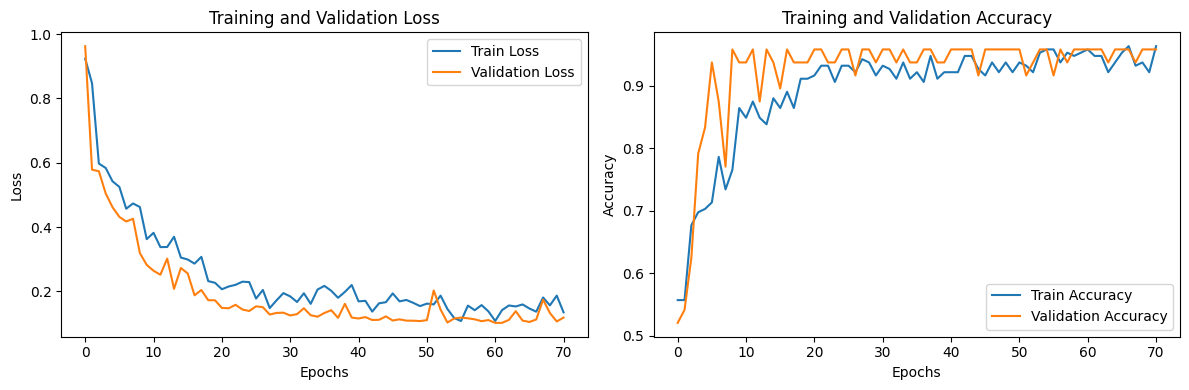

In [ ]:
# Extract loss and accuracy from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_pred_prob = ensemble_model.predict(test_generator, steps=len(test_generator))

# 예측된 확률을 이진 예측으로 변환
y_pred = np.round(y_pred_prob).flatten()

# 실제 라벨
y_true = test_generator.classes

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# 분류 보고서 출력
class_report = classification_report(y_true, y_pred, target_names=test_generator.class_indices)
print("Classification Report:\n", class_report)


3/3 [==============================] - 13s 2s/step
Confusion Matrix:
 [[14 10]
 [10 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.58      0.58        24
           1       0.72      0.72      0.72        36

    accuracy                           0.67        60
   macro avg       0.65      0.65      0.65        60
weighted avg       0.67      0.67      0.67        60



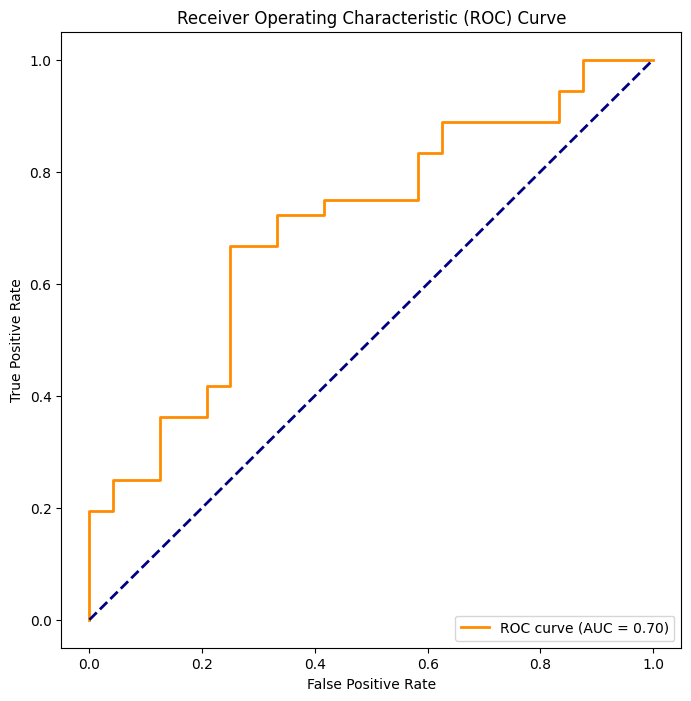

In [ ]:
# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

----

# Xception + ResNet101 + VGG19

In [ ]:
IMGSIZE = 256
BATCH_SIZE = 20
EPOCHS = 200

# 훈련 데이터에 대한 데이터 증강 설정
train_datagen = ImageDataGenerator(
    rescale=1./256,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 테스트 데이터에 대한 전처리 (증강을 적용하지 않음)
test_datagen = ImageDataGenerator(rescale=1./256)

# 훈련 데이터 제너레이터 생성
train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 검증 데이터 제너레이터 생성 (증강을 적용하지 않음)
val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 테스트 데이터 제너레이터 생성 (증강을 적용하지 않음)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 192 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.
Found 60 validated image filenames belonging to 2 classes.


In [ ]:
# Load pre-trained models
base_model_xception = Xception(weights='imagenet', include_top=False, input_shape=(IMGSIZE, IMGSIZE, 3))
base_model_vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=(IMGSIZE, IMGSIZE, 3))
base_model_resnet101 = ResNet101(weights='imagenet', include_top=False, input_shape=(IMGSIZE, IMGSIZE, 3))


# Freeze convolutional layers
for layer in base_model_xception.layers:
    layer.trainable = False

for layer in base_model_vgg19.layers:
    layer.trainable = False

for layer in base_model_resnet101.layers:
    layer.trainable = False

# Build an ensemble model
input_tensor = Input(shape=(IMGSIZE, IMGSIZE, 3))

x1 = base_model_xception(input_tensor)
x1 = GlobalAveragePooling2D()(x1)

x2 = base_model_vgg19(input_tensor)
x2 = GlobalAveragePooling2D()(x2)

x3 = base_model_resnet101(input_tensor)
x3 = GlobalAveragePooling2D()(x3)


# Concatenate the outputs of three models
merged = concatenate([x1, x2, x3])

# Dense layers for final classification
x = Dense(256, activation='relu')(merged)
x = Dense(1, activation='sigmoid')(x)

# Create the ensemble model
ensemble_model = Model(inputs=input_tensor, outputs=x)

# Compile the model
ensemble_model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = ensemble_model.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=val_generator,
        steps_per_epoch=len(train_generator),
        validation_steps=len(val_generator),
        callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_loss, test_accuracy = ensemble_model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

171446536/171446536 [==============================] - 5s 0us/step


Epoch 1/200
10/10 [==============================] - 199s 19s/step - loss: 0.5335 - accuracy: 0.7031 - val_loss: 0.4223 - val_accuracy: 0.7917
Epoch 2/200
10/10 [==============================] - 36s 4s/step - loss: 0.1206 - accuracy: 0.9635 - val_loss: 0.1919 - val_accuracy: 0.9375
Epoch 3/200
10/10 [==============================] - 35s 4s/step - loss: 0.0622 - accuracy: 0.9844 - val_loss: 0.3474 - val_accuracy: 0.8958
Epoch 4/200
10/10 [==============================] - 35s 4s/step - loss: 0.0493 - accuracy: 0.9844 - val_loss: 0.1335 - val_accuracy: 0.9583
Epoch 5/200
10/10 [==============================] - 34s 3s/step - loss: 0.0431 - accuracy: 0.9896 - val_loss: 0.1861 - val_accuracy: 0.9375
Epoch 6/200
10/10 [==============================] - 34s 3s/step - loss: 0.0333 - accuracy: 0.9844 - val_loss: 0.1007 - val_accuracy: 0.9583
Epoch 7/200
10/10 [==============================] - 34s 4s/step - loss: 0.0346 - accuracy: 0.9844 - val_loss: 0.0990 - val_accuracy: 0.9583
Epoch 8/200

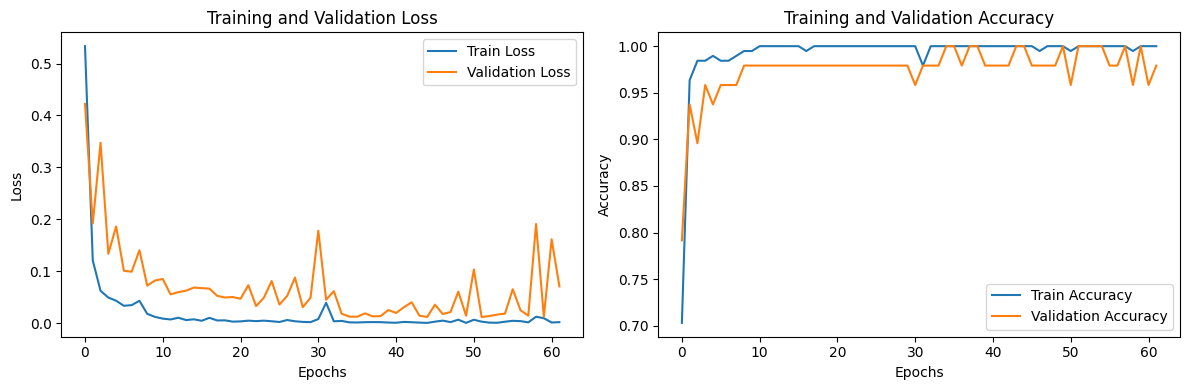

In [ ]:
# Extract loss and accuracy from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_pred_prob = ensemble_model.predict(test_generator, steps=len(test_generator))

# 예측된 확률을 이진 예측으로 변환
y_pred = np.round(y_pred_prob).flatten()

# 실제 라벨
y_true = test_generator.classes

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# 분류 보고서 출력
class_report = classification_report(y_true, y_pred, target_names=test_generator.class_indices)
print("Classification Report:\n", class_report)

3/3 [==============================] - 10s 2s/step
Confusion Matrix:
 [[ 9 15]
 [15 21]]
Classification Report:
               precision    recall  f1-score   support

           0       0.38      0.38      0.38        24
           1       0.58      0.58      0.58        36

    accuracy                           0.50        60
   macro avg       0.48      0.48      0.48        60
weighted avg       0.50      0.50      0.50        60



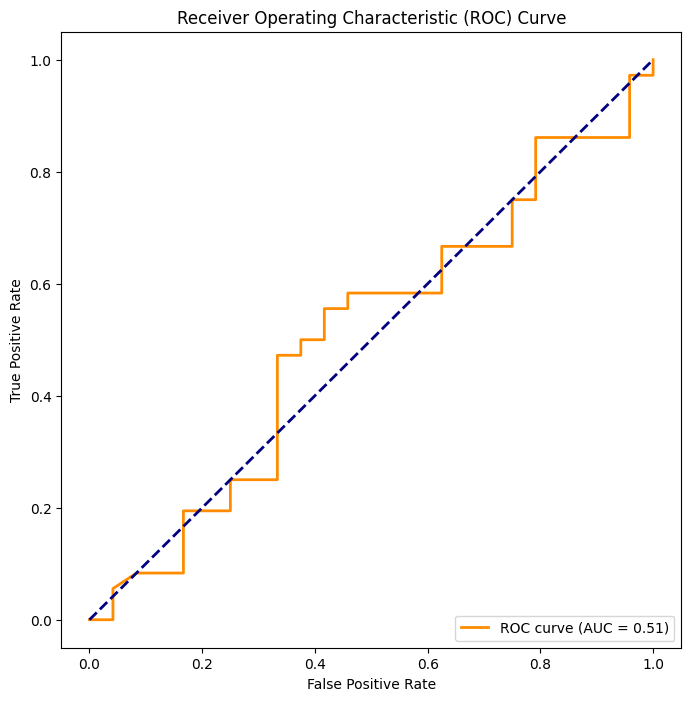

In [ ]:
# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
IMGSIZE = 256
BATCH_SIZE = 20
EPOCHS = 200

# 훈련 데이터에 대한 데이터 증강 설정
train_datagen = ImageDataGenerator(
    rescale=1./256,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 테스트 데이터에 대한 전처리 (증강을 적용하지 않음)
test_datagen = ImageDataGenerator(rescale=1./256)

# 훈련 데이터 제너레이터 생성
train_generator = train_datagen.flow_from_dataframe(
    dataframe=X_train,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 검증 데이터 제너레이터 생성 (증강을 적용하지 않음)
val_generator = test_datagen.flow_from_dataframe(
    dataframe=X_val,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

# 테스트 데이터 제너레이터 생성 (증강을 적용하지 않음)
test_generator = test_datagen.flow_from_dataframe(
    dataframe=X_test,
    x_col='image path',
    y_col='label',
    target_size=(IMGSIZE, IMGSIZE),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 192 validated image filenames belonging to 2 classes.
Found 48 validated image filenames belonging to 2 classes.
Found 60 validated image filenames belonging to 2 classes.


In [ ]:
# Load pre-trained models
base_model_xception = Xception(weights='imagenet', include_top=False, input_shape=(IMGSIZE, IMGSIZE, 3))
base_model_inceptionv3 = InceptionV3 (weights='imagenet', include_top=False, input_shape=(IMGSIZE, IMGSIZE, 3))
base_model_densenet201 = DenseNet201(weights='imagenet', include_top=False, input_shape=(IMGSIZE, IMGSIZE, 3))


# Freeze convolutional layers
for layer in base_model_xception.layers:
    layer.trainable = False

for layer in base_model_inceptionv3.layers:
    layer.trainable = False

for layer in base_model_densenet201.layers:
    layer.trainable = False

# Build an ensemble model
input_tensor = Input(shape=(IMGSIZE, IMGSIZE, 3))

x1 = base_model_xception(input_tensor)
x1 = GlobalAveragePooling2D()(x1)

x2 = base_model_inceptionv3(input_tensor)
x2 = GlobalAveragePooling2D()(x2)

x3 = base_model_densenet201(input_tensor)
x3 = GlobalAveragePooling2D()(x3)


# Concatenate the outputs of three models
merged = concatenate([x1, x2, x3])

# Dense layers for final classification
x = Dense(256, activation='relu')(merged)
x = Dense(1, activation='sigmoid')(x)

# Create the ensemble model
ensemble_model = Model(inputs=input_tensor, outputs=x)

# Compile the model
ensemble_model.compile(optimizer=Adam(lr=0.001), loss='binary_crossentropy', metrics=['accuracy'])


early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = ensemble_model.fit(
        train_generator,
        epochs=EPOCHS,
        validation_data=val_generator,
        steps_per_epoch=len(train_generator),
        validation_steps=len(val_generator),
        callbacks=[early_stopping]
)

# Evaluate the model on the test set
test_loss, test_accuracy = ensemble_model.evaluate(test_generator, steps=len(test_generator))
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Epoch 1/200
10/10 [==============================] - 190s 17s/step - loss: 0.4612 - accuracy: 0.8073 - val_loss: 1.0101 - val_accuracy: 0.6250
Epoch 2/200
10/10 [==============================] - 32s 3s/step - loss: 0.1601 - accuracy: 0.9479 - val_loss: 0.1584 - val_accuracy: 0.9375
Epoch 3/200
10/10 [==============================] - 32s 3s/step - loss: 0.0208 - accuracy: 0.9948 - val_loss: 0.2353 - val_accuracy: 0.9583
Epoch 4/200
10/10 [==============================] - 32s 3s/step - loss: 0.0497 - accuracy: 0.9844 - val_loss: 0.1121 - val_accuracy: 0.9375
Epoch 5/200
10/10 [==============================] - 31s 3s/step - loss: 0.0622 - accuracy: 0.9792 - val_loss: 0.2359 - val_accuracy: 0.9583
Epoch 6/200
10/10 [==============================] - 32s 3s/step - loss: 0.0155 - accuracy: 0.9948 - val_loss: 0.0871 - val_accuracy: 0.9792
Epoch 7/200
10/10 [==============================] - 32s 3s/step - loss: 0.0118 - accuracy: 0.9948 - val_loss: 0.3201 - val_accuracy: 0.9583
Epoch 8/200

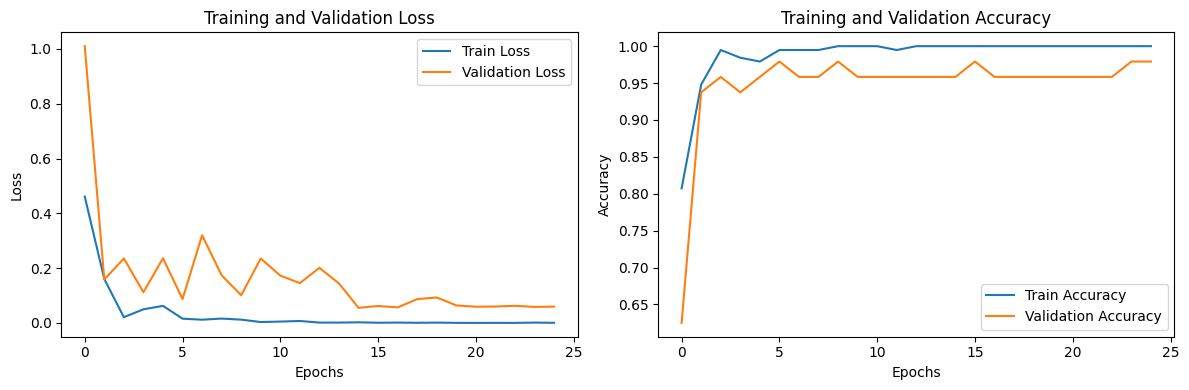

In [ ]:
# Extract loss and accuracy from history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_pred_prob = ensemble_model.predict(test_generator, steps=len(test_generator))

# 예측된 확률을 이진 예측으로 변환
y_pred = np.round(y_pred_prob).flatten()

# 실제 라벨
y_true = test_generator.classes

# 혼동 행렬 출력
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# 분류 보고서 출력
class_report = classification_report(y_true, y_pred, target_names=test_generator.class_indices)
print("Classification Report:\n", class_report)

3/3 [==============================] - 12s 2s/step
Confusion Matrix:
 [[11 13]
 [13 23]]
Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.46      0.46        24
           1       0.64      0.64      0.64        36

    accuracy                           0.57        60
   macro avg       0.55      0.55      0.55        60
weighted avg       0.57      0.57      0.57        60



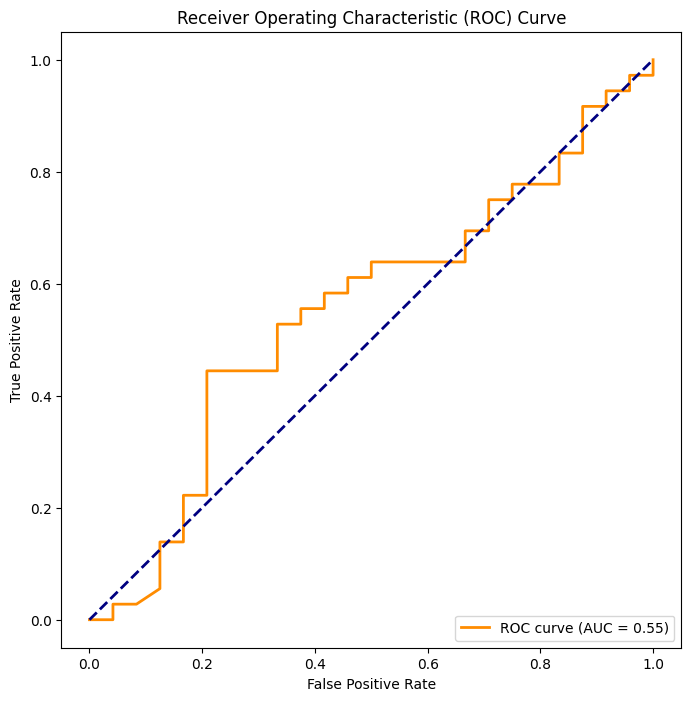

In [ ]:
# ROC 커브 계산
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# AUC 계산
roc_auc = auc(fpr, tpr)

# ROC 커브 그리기
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

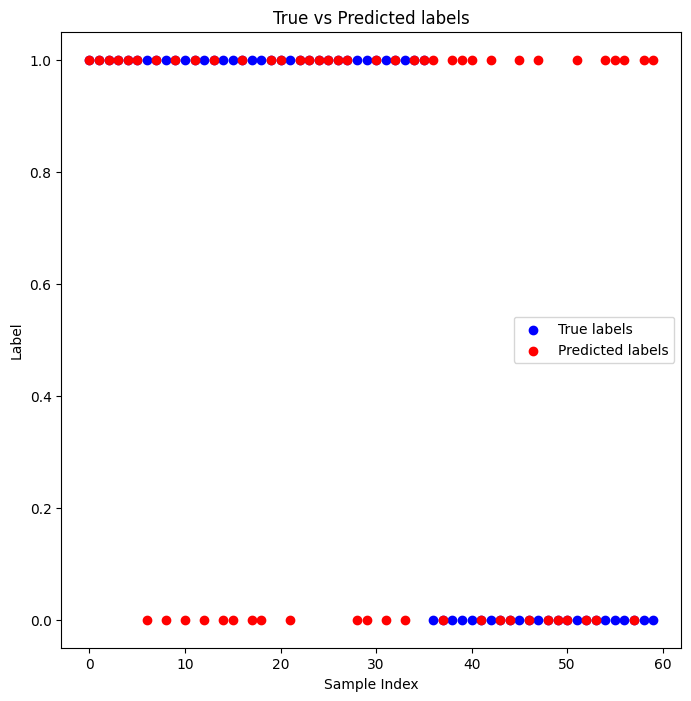

In [ ]:

# 예측 결과 시각화
plt.figure(figsize=(8, 8))
plt.scatter(range(len(y_true)), y_true, color='blue', label='True labels')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted labels')
plt.title('True vs Predicted labels')
plt.xlabel('Sample Index')
plt.ylabel('Label')
plt.legend()
plt.show()